# vanillaNetwork
### Completed by Joe Arul Susai Prakash (U34351756) in fulfillment of Module 1,2 - Mathematical Building Blocks of Neural Networks assignment for the ISM6390 Tech Foundation of AI class

## 1) Backpropagation

### - For the following function: $f(a,b,c,d,e) = \frac{1}{(1+(a^b + c^d)*e)^2}$, compute the gradient of the function with respect it to its inputs at $(a,b,c,d,e) = (1,1,1,1,1)$.

The function $\frac{1}{(1+(a^b + c^d)*e)^2}$ can be split into multiple levels in order to differentiate using backpropagation

- We have 5 inputs a,b,c,d,e
- a and b contribute to j. j= $a^b$
- c and d contribute to k. k= $c^d$
- j and k contribute to m. m=j+k
- m and e contribute to n. n=m*e
- p = 1+n
- output f = 1/$p^2$

We use backpropagation to calculate derivative of f w.r.t each input using chain rule.


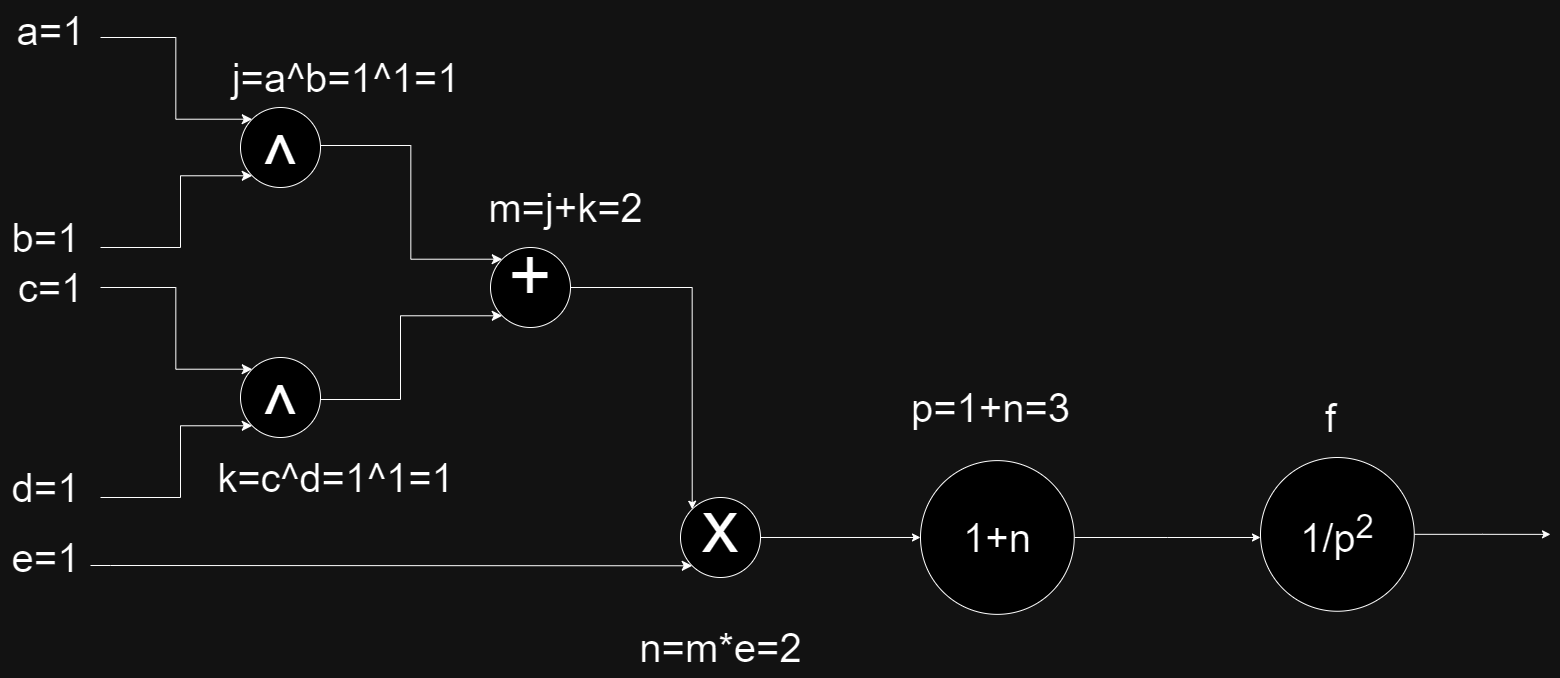

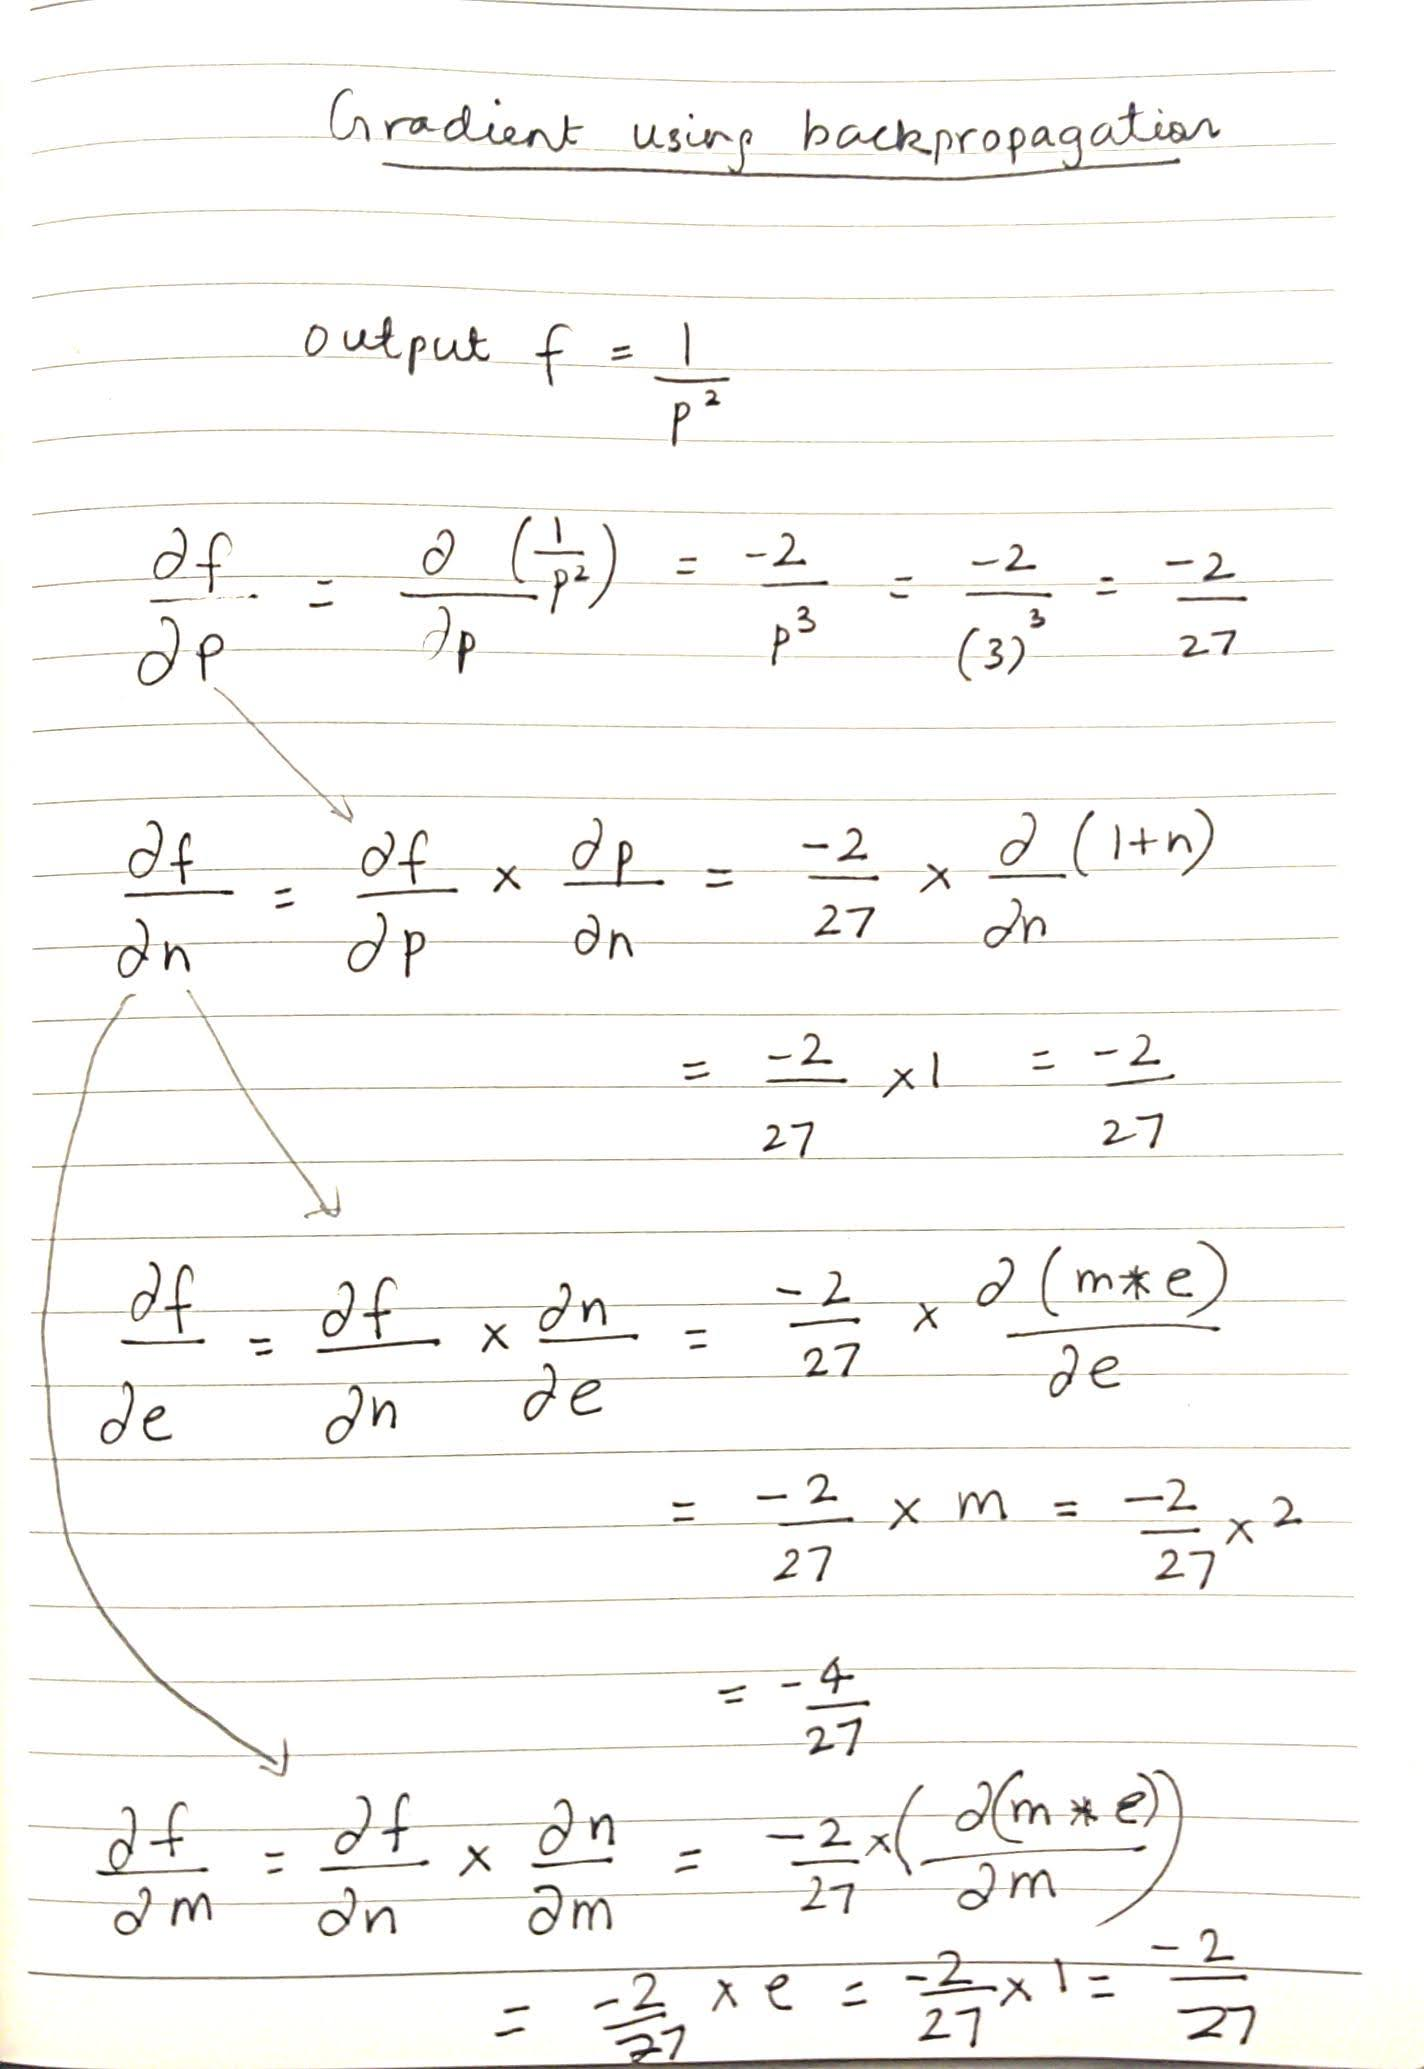

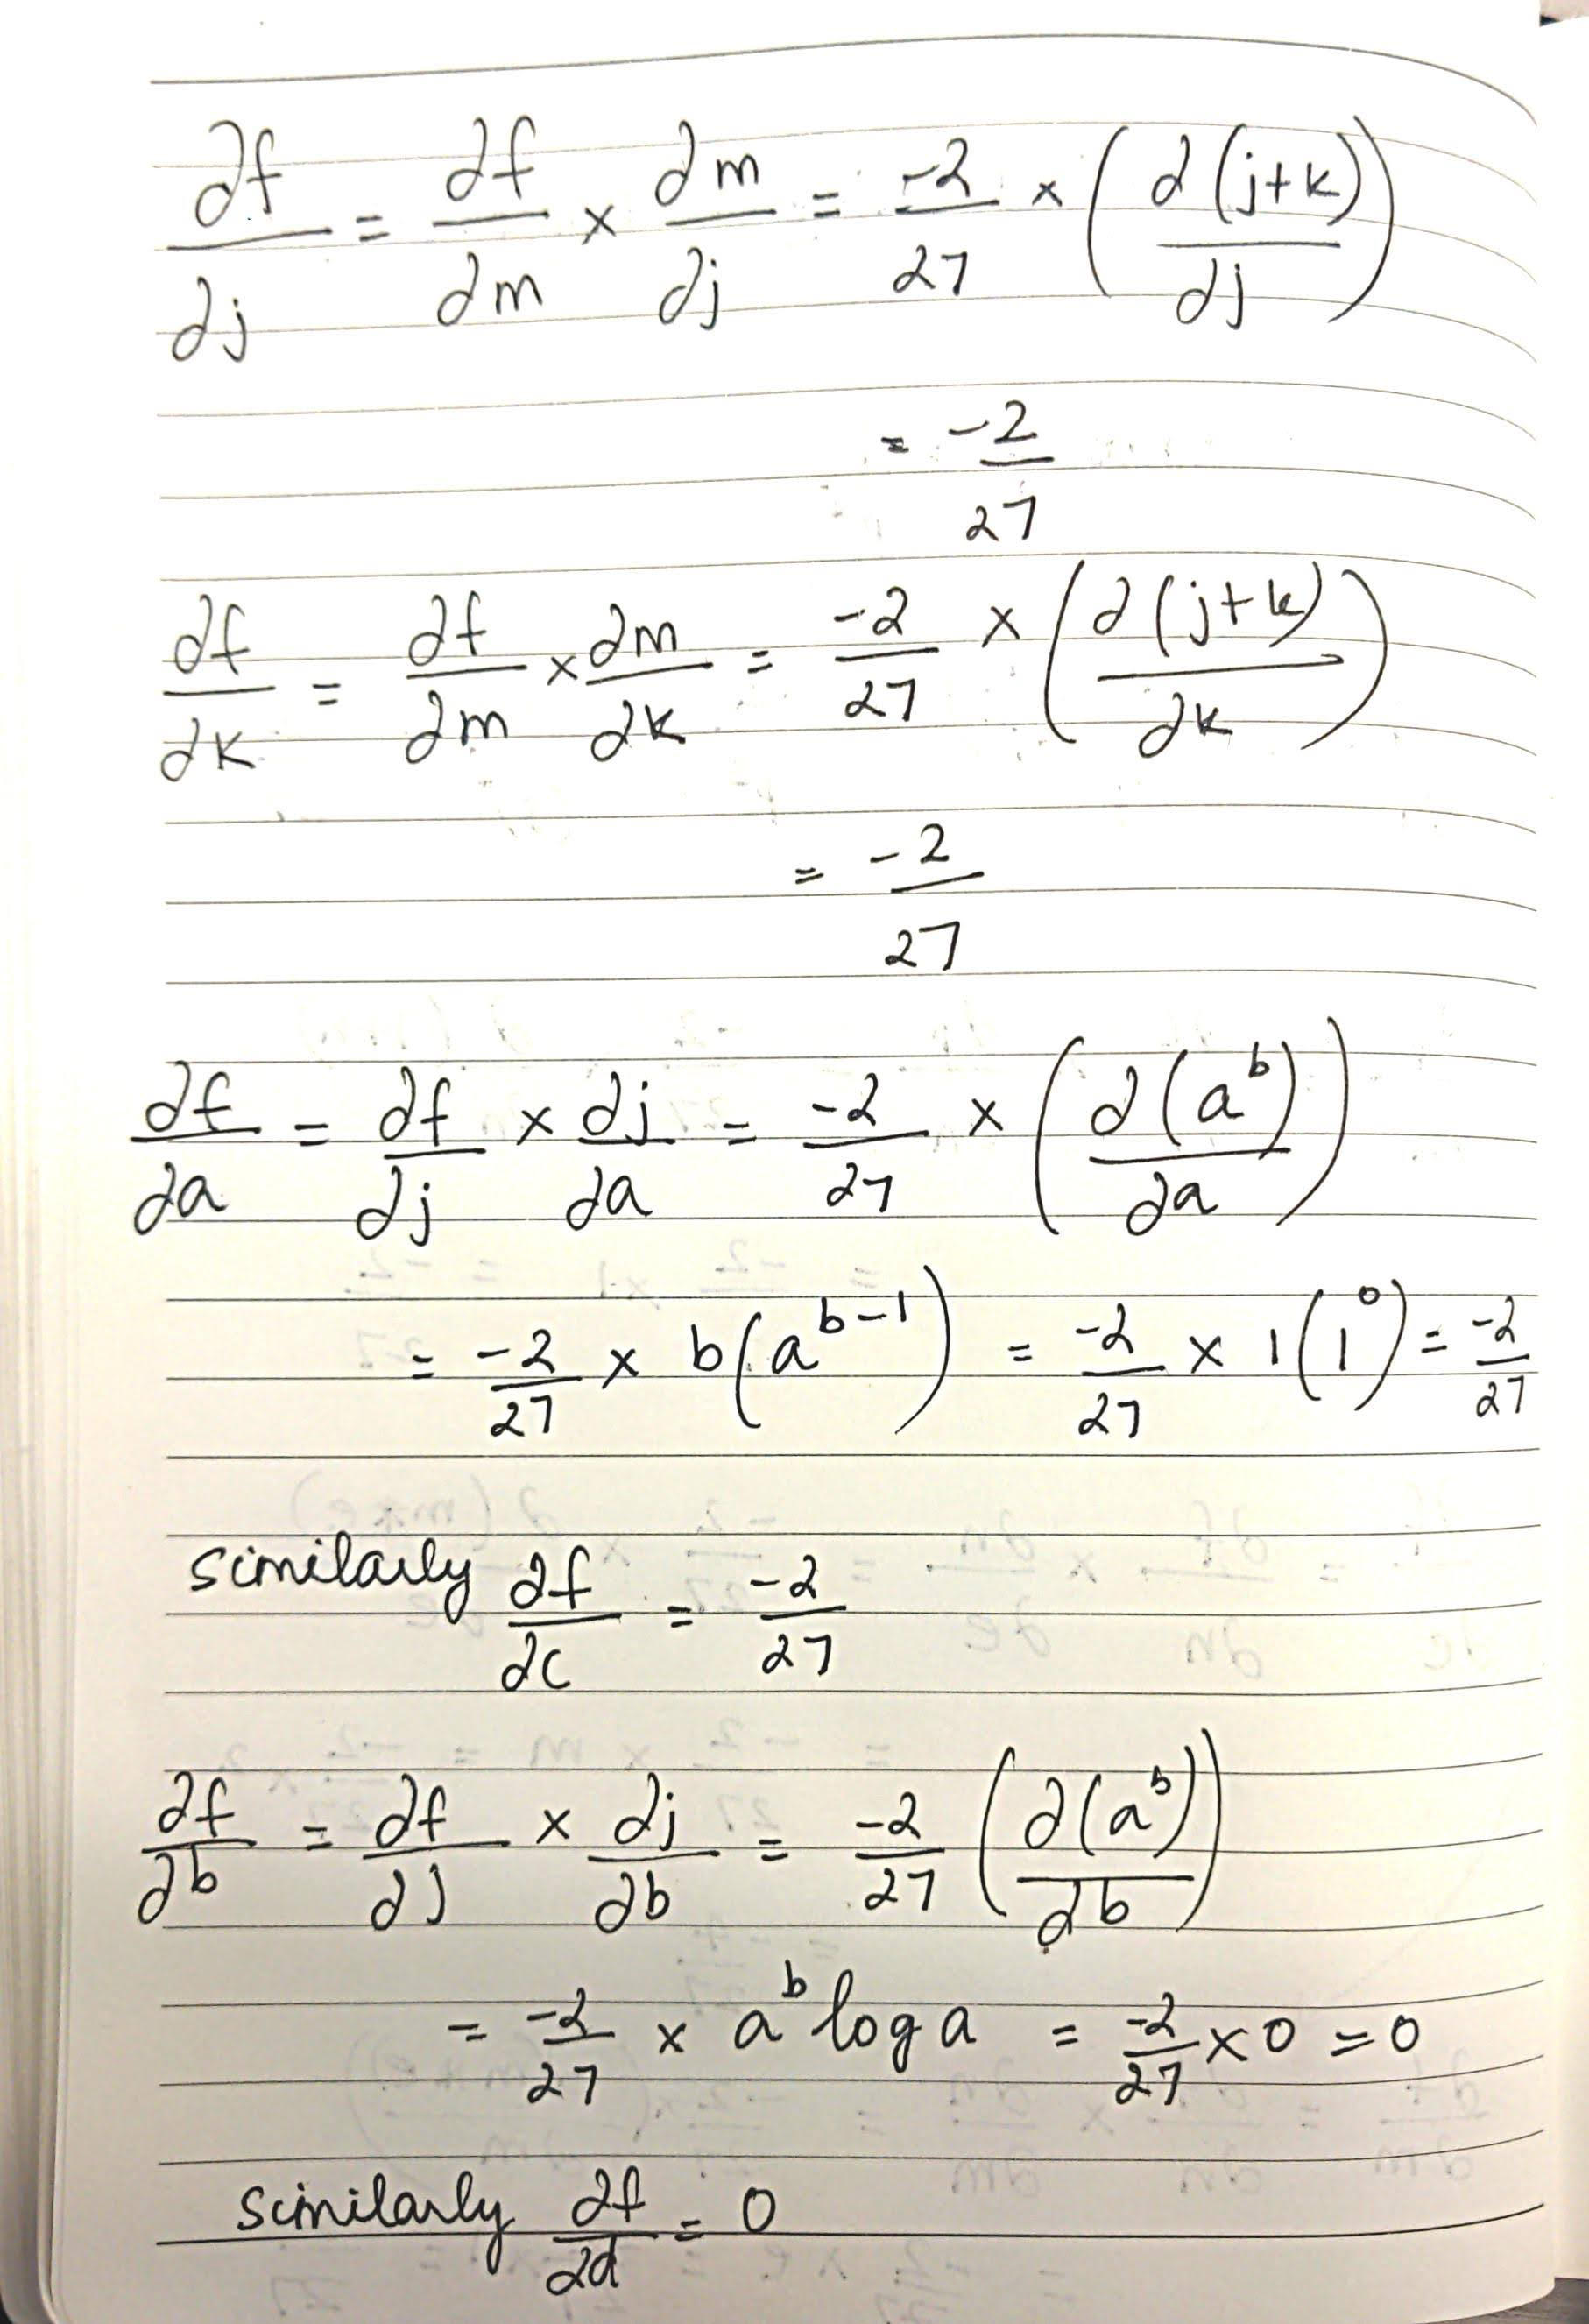

### The gradients of the function w.r.t its inputs at (a,b,c,d,e) = (1,1,1,1,1) are [$\frac{-2}{27},0,\frac{-2}{27},0,\frac{-4}{27}$]

## 2) Gradient Descent

 ### - Step 1: Write a function to compute the mean squared error between a prediction and ground truth assuming both are numpy arrays

#### Answer: 
Mean Squared Error (M.S.E) = $\frac{1}{n}$ * (Sum of Squared Errors) = $\frac{1}{n}$ *  $\sum_{i=1}^n (y_i-\hat y_i)^2$

where $y_i$ is the ground truth and $\hat y_i$ is the prediction for each input $X_i$

Source : https://www.sfu.ca/sasdoc/sashtml/ets/chap30/sect19.htm


In [1]:
import numpy as np

def MSE(y, y_pred):
    # count number of elements in target y
    n = y.size
    # initiate loop from 1 to n to calculate SSE
    sse = 0.0
    for i in range(n):
        # calculate ground truth - prediction for each observation
        squared_error = (y[i] - y_pred[i]) ** 2
        sse += squared_error
    # divide SSE by number of observations to find mean
    mse = (1/n) * sse    
    return mse

### - Steps 2 and 3: Consider a model: $y = mx + c$, where the model parameter $m = 1$ and parameter $c = 0$ and $x \in (0,1)$. Plot the function using matplotlib. Generate example data by drawing $N = 100$ uniform values from the range in which $x$ lies, and compute the corresponding $y$ to get $\{x_i,y_i\}_{i=1}^{N}$.

#### Answer: 
Substituting gradient($m$) as 1 and intercept($c$) as 0 in equation $y = mx + c$, we get $y = x$.

In [57]:
# generating 100 random values for X in range 0 to 1

np.random.seed(1756)
X = np.random.uniform(0, 1, 100)
# apply function on X to find y
y = X
# print few values in {X,y} data
for i in range(10):
    print('{',X[i],',',y[i],'}')
    

{ 0.24647146620919336 , 0.24647146620919336 }
{ 0.4912773070824472 , 0.4912773070824472 }
{ 0.8823015505783451 , 0.8823015505783451 }
{ 0.05129899339153199 , 0.05129899339153199 }
{ 0.38420651431679553 , 0.38420651431679553 }
{ 0.8051857632077757 , 0.8051857632077757 }
{ 0.03307219419314755 , 0.03307219419314755 }
{ 0.14013298079285252 , 0.14013298079285252 }
{ 0.2079553687687281 , 0.2079553687687281 }
{ 0.8637580448924935 , 0.8637580448924935 }


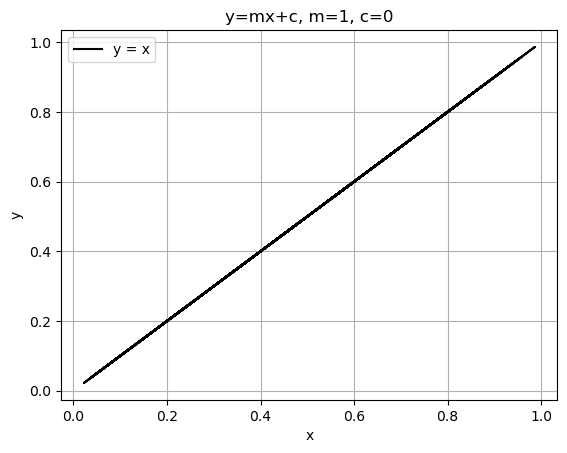

In [58]:
# using sample data generated, plot y=x
import matplotlib.pyplot as plt

# Plot X vs y
plt.plot(X, y, label='y = x', color='black')

# Add labels and a legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=mx+c, m=1, c=0')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

 ### - Step 4: Assuming that you do not know the model parameters, use backpropagation and gradient descent updates to find the model parameters (choose an appropriate learning rate). The loss function will be the mean squared error.

Given:
- $y=mx+c$
- X, y are available from previous step
- loss function : MSE
- Optimization : minimize Loss function using gradient descent


#### Deriving formula for gradient
Reference : https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc

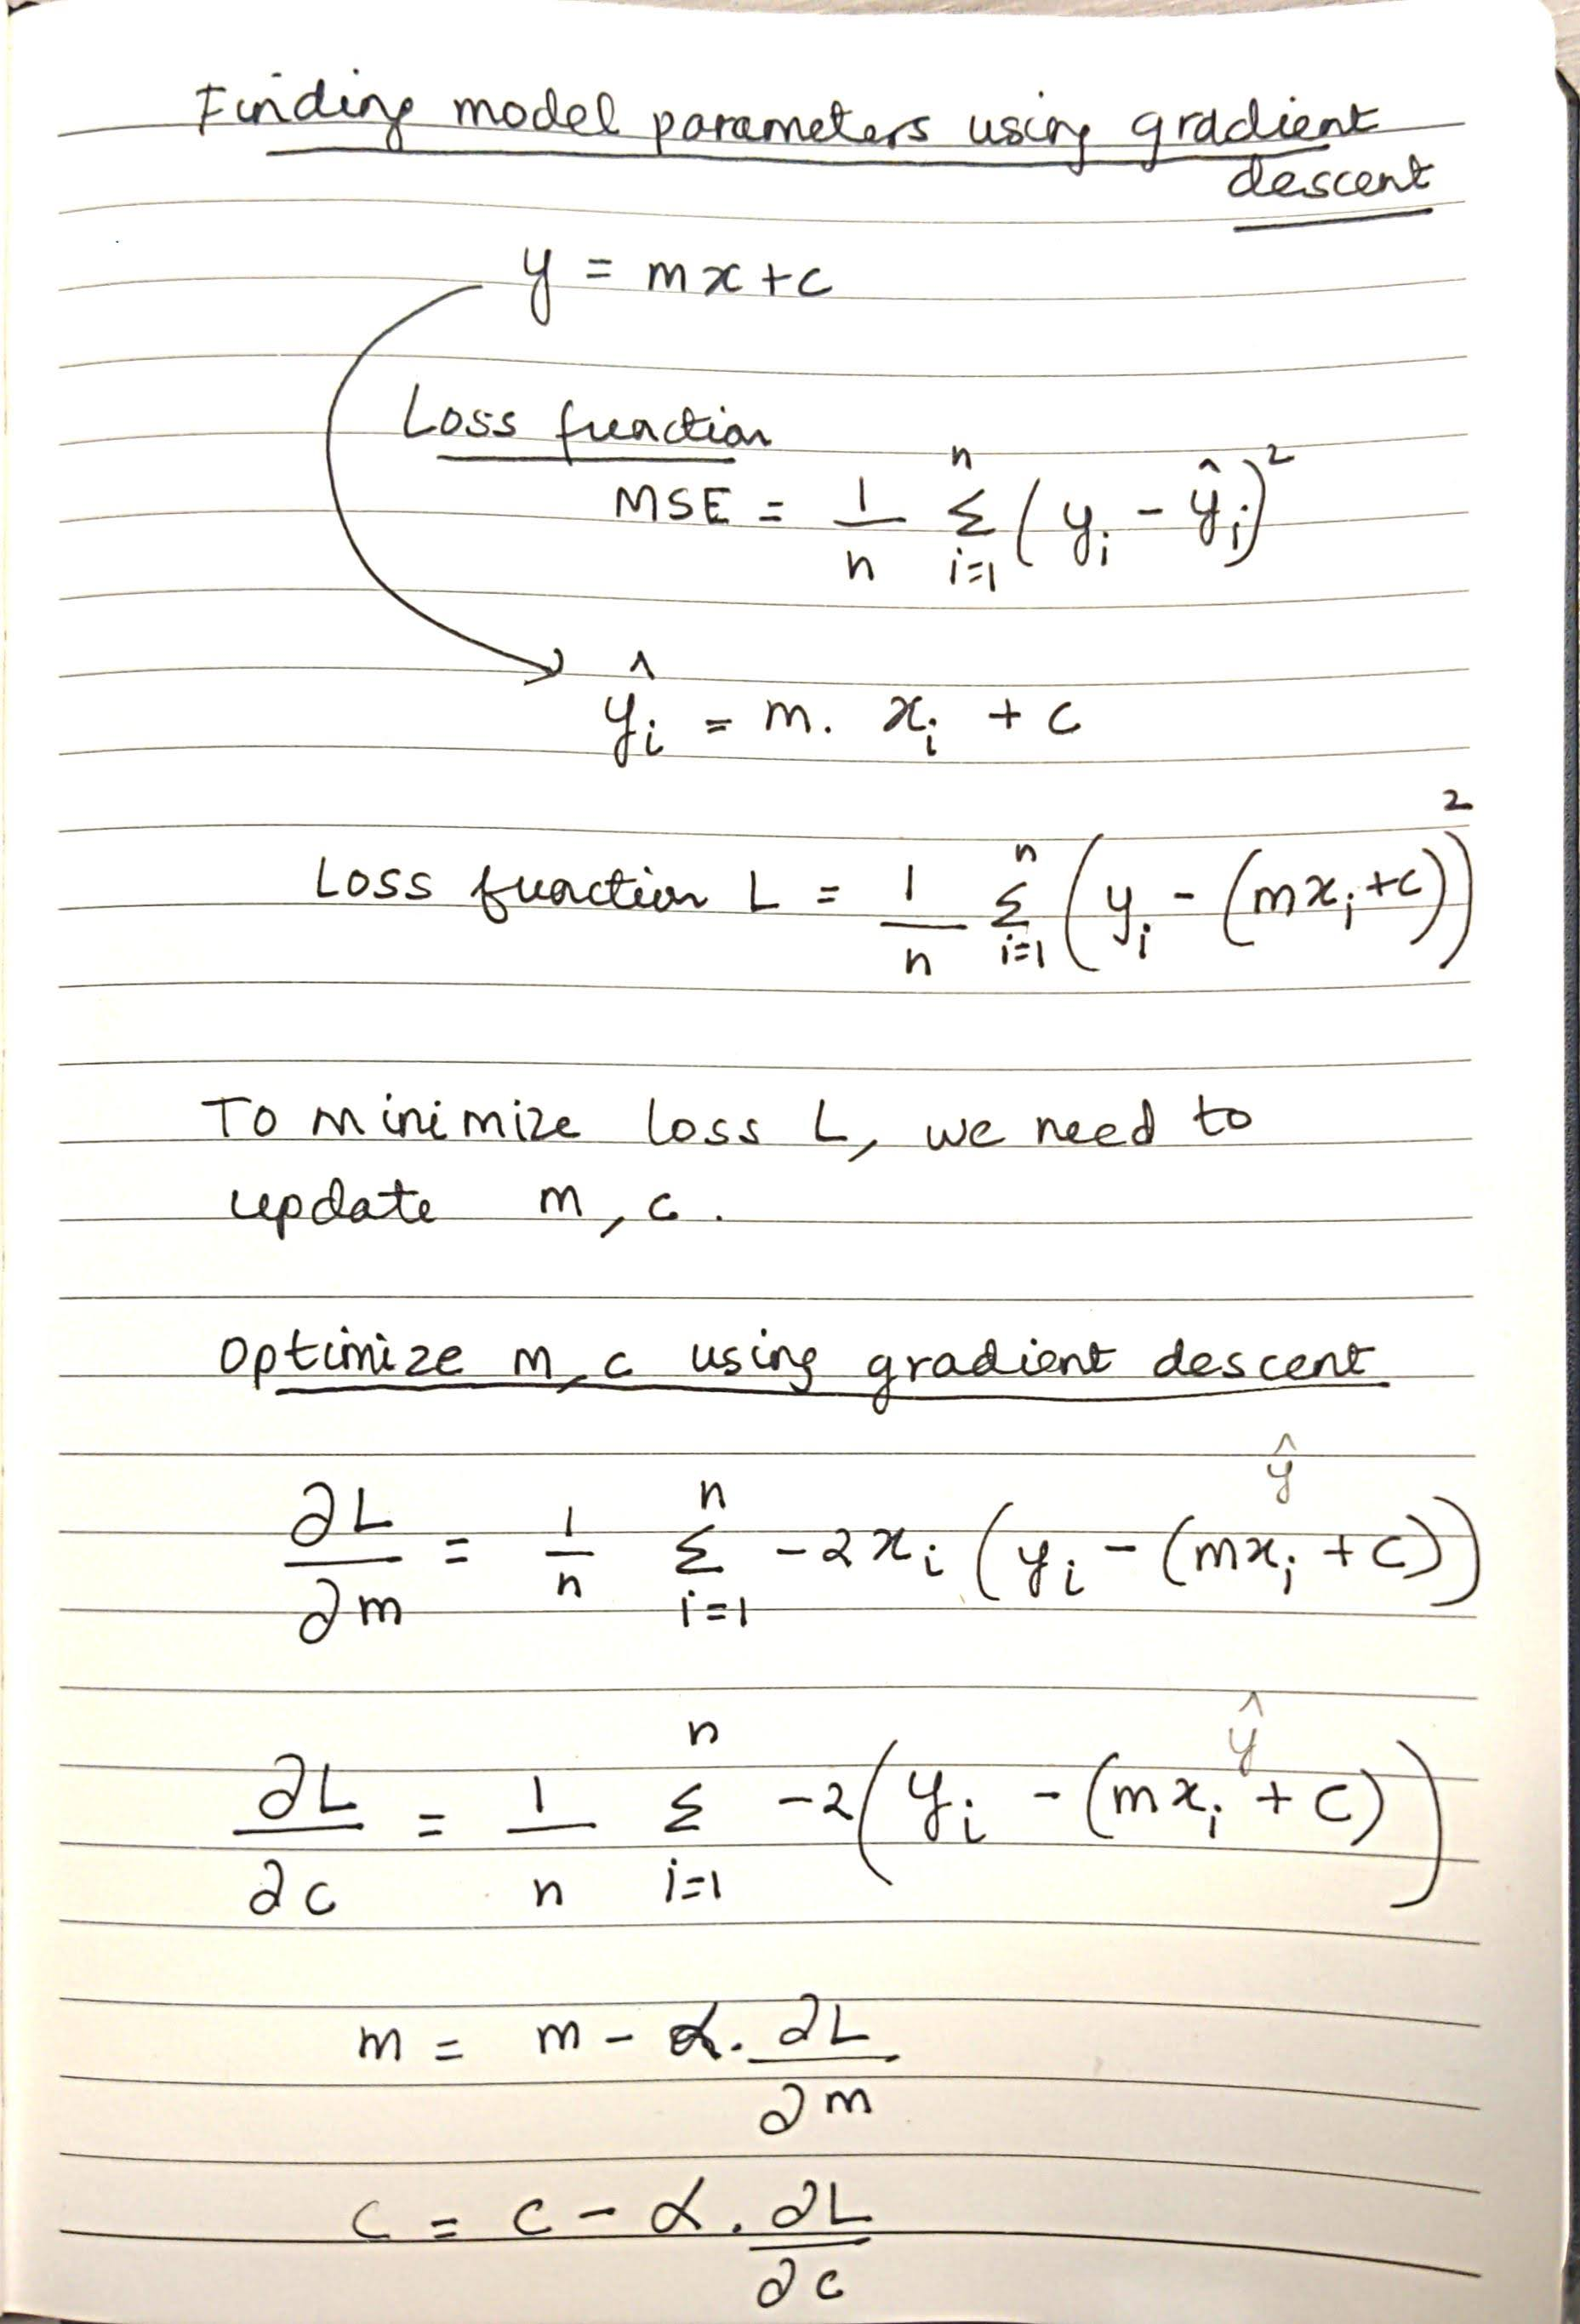

#### Programmatic implementation of above theory

In [40]:
# Initialize weight and bias
m = 0.5
c = 0.5

# number of iterations
iter = 500

# count of rows
n = 100

# learning rate
alpha = 0.05
# empty array for loss and iteration
iterarray , loss = [], []

for j in range(iter):
    
    # replicating calculation from above snippet
    yhat = m*X + c
    # summation of derivative w.r.t 'm'
    sigm = 0
    # summation of derivative w.r.t 'c'
    sigc = 0
    for i in range(n):
        sigm=sigm+(-2*X[i]*(y[i]-yhat[i]))
        sigc=sigc+(-2*(y[i]-yhat[i]))
    # dL/dm
    dLdm = (1/n)*sigm
    # dL/dc
    dLdc = (1/n)*sigc
    # update weight and bias accordingly
    m = m - (alpha*dLdm)
    c = c - (alpha*dLdc)
    loss.append(MSE(y,yhat))
    iterarray.append(j)

print('MODEL PARAMETERS:')
print('weight m:',m,', bias c:',c)

MODEL PARAMETERS:
weight m: 0.9788004139271952 , bias c: 0.01098904666891471


 ### - Step 5: Plot the error in the estimates as a function of the number of iterations of gradient update. Change the learning rate and plot another curve on the previous plot.

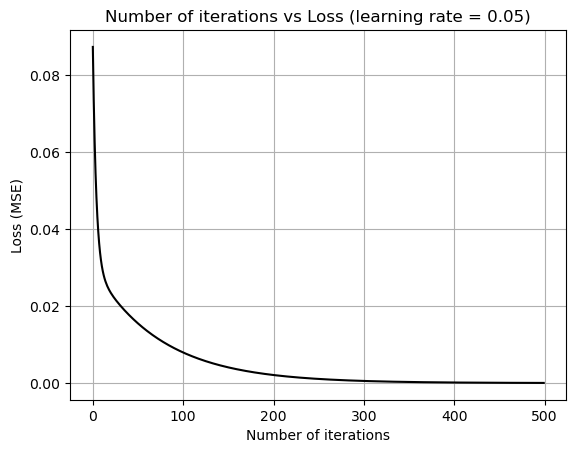

In [43]:
plt.plot(iterarray, loss, color='black')

# Add labels and a legend
plt.xlabel('Number of iterations')
plt.ylabel('Loss (MSE)')
plt.title('Number of iterations vs Loss (learning rate = 0.05)')

# Show the plot
plt.grid(True)
plt.show()

#### Changing learning rate (alpha)

In [49]:
# Initialize weight and bias
m = 0.5
c = 0.5

# number of iterations
iter = 500

# count of rows
n = 100

# learning rate
alpha = 0.1
# empty array for loss and iteration
iterarray , loss2 = [], []

for j in range(iter):
    
    # replicating calculation from above snippet
    yhat = m*X + c
    # summation of derivative w.r.t 'm'
    sigm = 0
    # summation of derivative w.r.t 'c'
    sigc = 0
    for i in range(n):
        sigm=sigm+(-2*X[i]*(y[i]-yhat[i]))
        sigc=sigc+(-2*(y[i]-yhat[i]))
    # dL/dm
    dLdm = (1/n)*sigm
    # dL/dc
    dLdc = (1/n)*sigc
    # update weight and bias accordingly
    m = m - (alpha*dLdm)
    c = c - (alpha*dLdc)
    loss2.append(MSE(y,yhat))
    iterarray.append(j)

print('MODEL PARAMETERS:')
print('weight m:',m,', bias c:',c)

MODEL PARAMETERS:
weight m: 0.9992656355404258 , bias c: 0.00038066617388369877


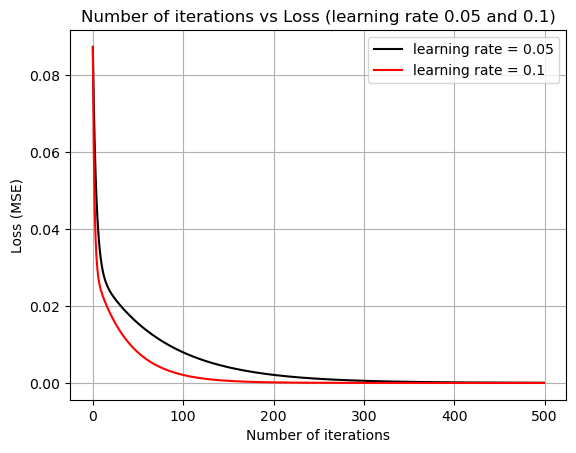

In [52]:
plt.plot(iterarray, loss, color='black',label='learning rate = 0.05')
plt.plot(iterarray, loss2, color='red',label='learning rate = 0.1')
# Add labels and a legend
plt.xlabel('Number of iterations')
plt.ylabel('Loss (MSE)')
plt.title('Number of iterations vs Loss (learning rate 0.05 and 0.1)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### - Do steps 3-5 when the model is $y = m_1x + m_2x^2 + c$ and the true parameters are $m_1 = 0.5$, $m_2 = 1$ and $c = 1$. And $x \in (0,1)$. Also, plot the ground truth function (i.e., with the true values of $m_1,m_2$ and $c$). Compare and contrast the plot with the previous one.

#### Answer: 
Substituting gradient($m_1$) as 0.5, gradient($m_2$) as 1 and intercept($c$) as 1 in equation $y = m_1x + m_2x^2 +  c$, we get $y = 0.5x + x^2 + 1$.

#### Generating random data for function

In [60]:
# generating 100 random values for X in range 0 to 1

np.random.seed(1756)
X = np.random.uniform(0, 1, 100)
# apply function on X to find y
y = X**2 + (0.5*X) + 1
# print few values in {X,y} data
for i in range(10):
    print('{',X[i],',',y[i],'}')

{ 0.24647146620919336 , 1.1839839167599062 }
{ 0.4912773070824472 , 1.4869920459954047 }
{ 0.8823015505783451 , 2.219606801442125 }
{ 0.05129899339153199 , 1.0282810834187504 }
{ 0.38420651431679553 , 1.3397179028018598 }
{ 0.8051857632077757 , 2.050916994876376 }
{ 0.03307219419314755 , 1.017629867125323 }
{ 0.14013298079285252 , 1.0897037427023162 }
{ 0.2079553687687281 , 1.1472231197841016 }
{ 0.8637580448924935 , 2.1779569825627494 }


#### Plot ground truth function with random data generated

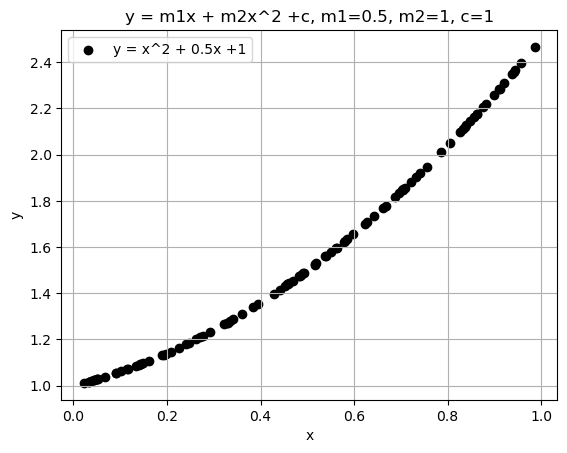

In [61]:
# Plot X vs y
plt.scatter(X, y, label='y = x^2 + 0.5x +1', color='black')

# Add labels and a legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = m1x + m2x^2 +c, m1=0.5, m2=1, c=1')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#### Comparing the graphs of $y = 0.5x + x^2 + 1$ and $y = x$
- y = x is a linear function, and thus has a straight graph, whereas y = $x^2$ + 0.5x + 1 is quadratic and thus has a curved graph.
- Both are upward facing as the value of x in both cases is +ve, i.e. between 0 and 1

#### Deriving formula for gradient


 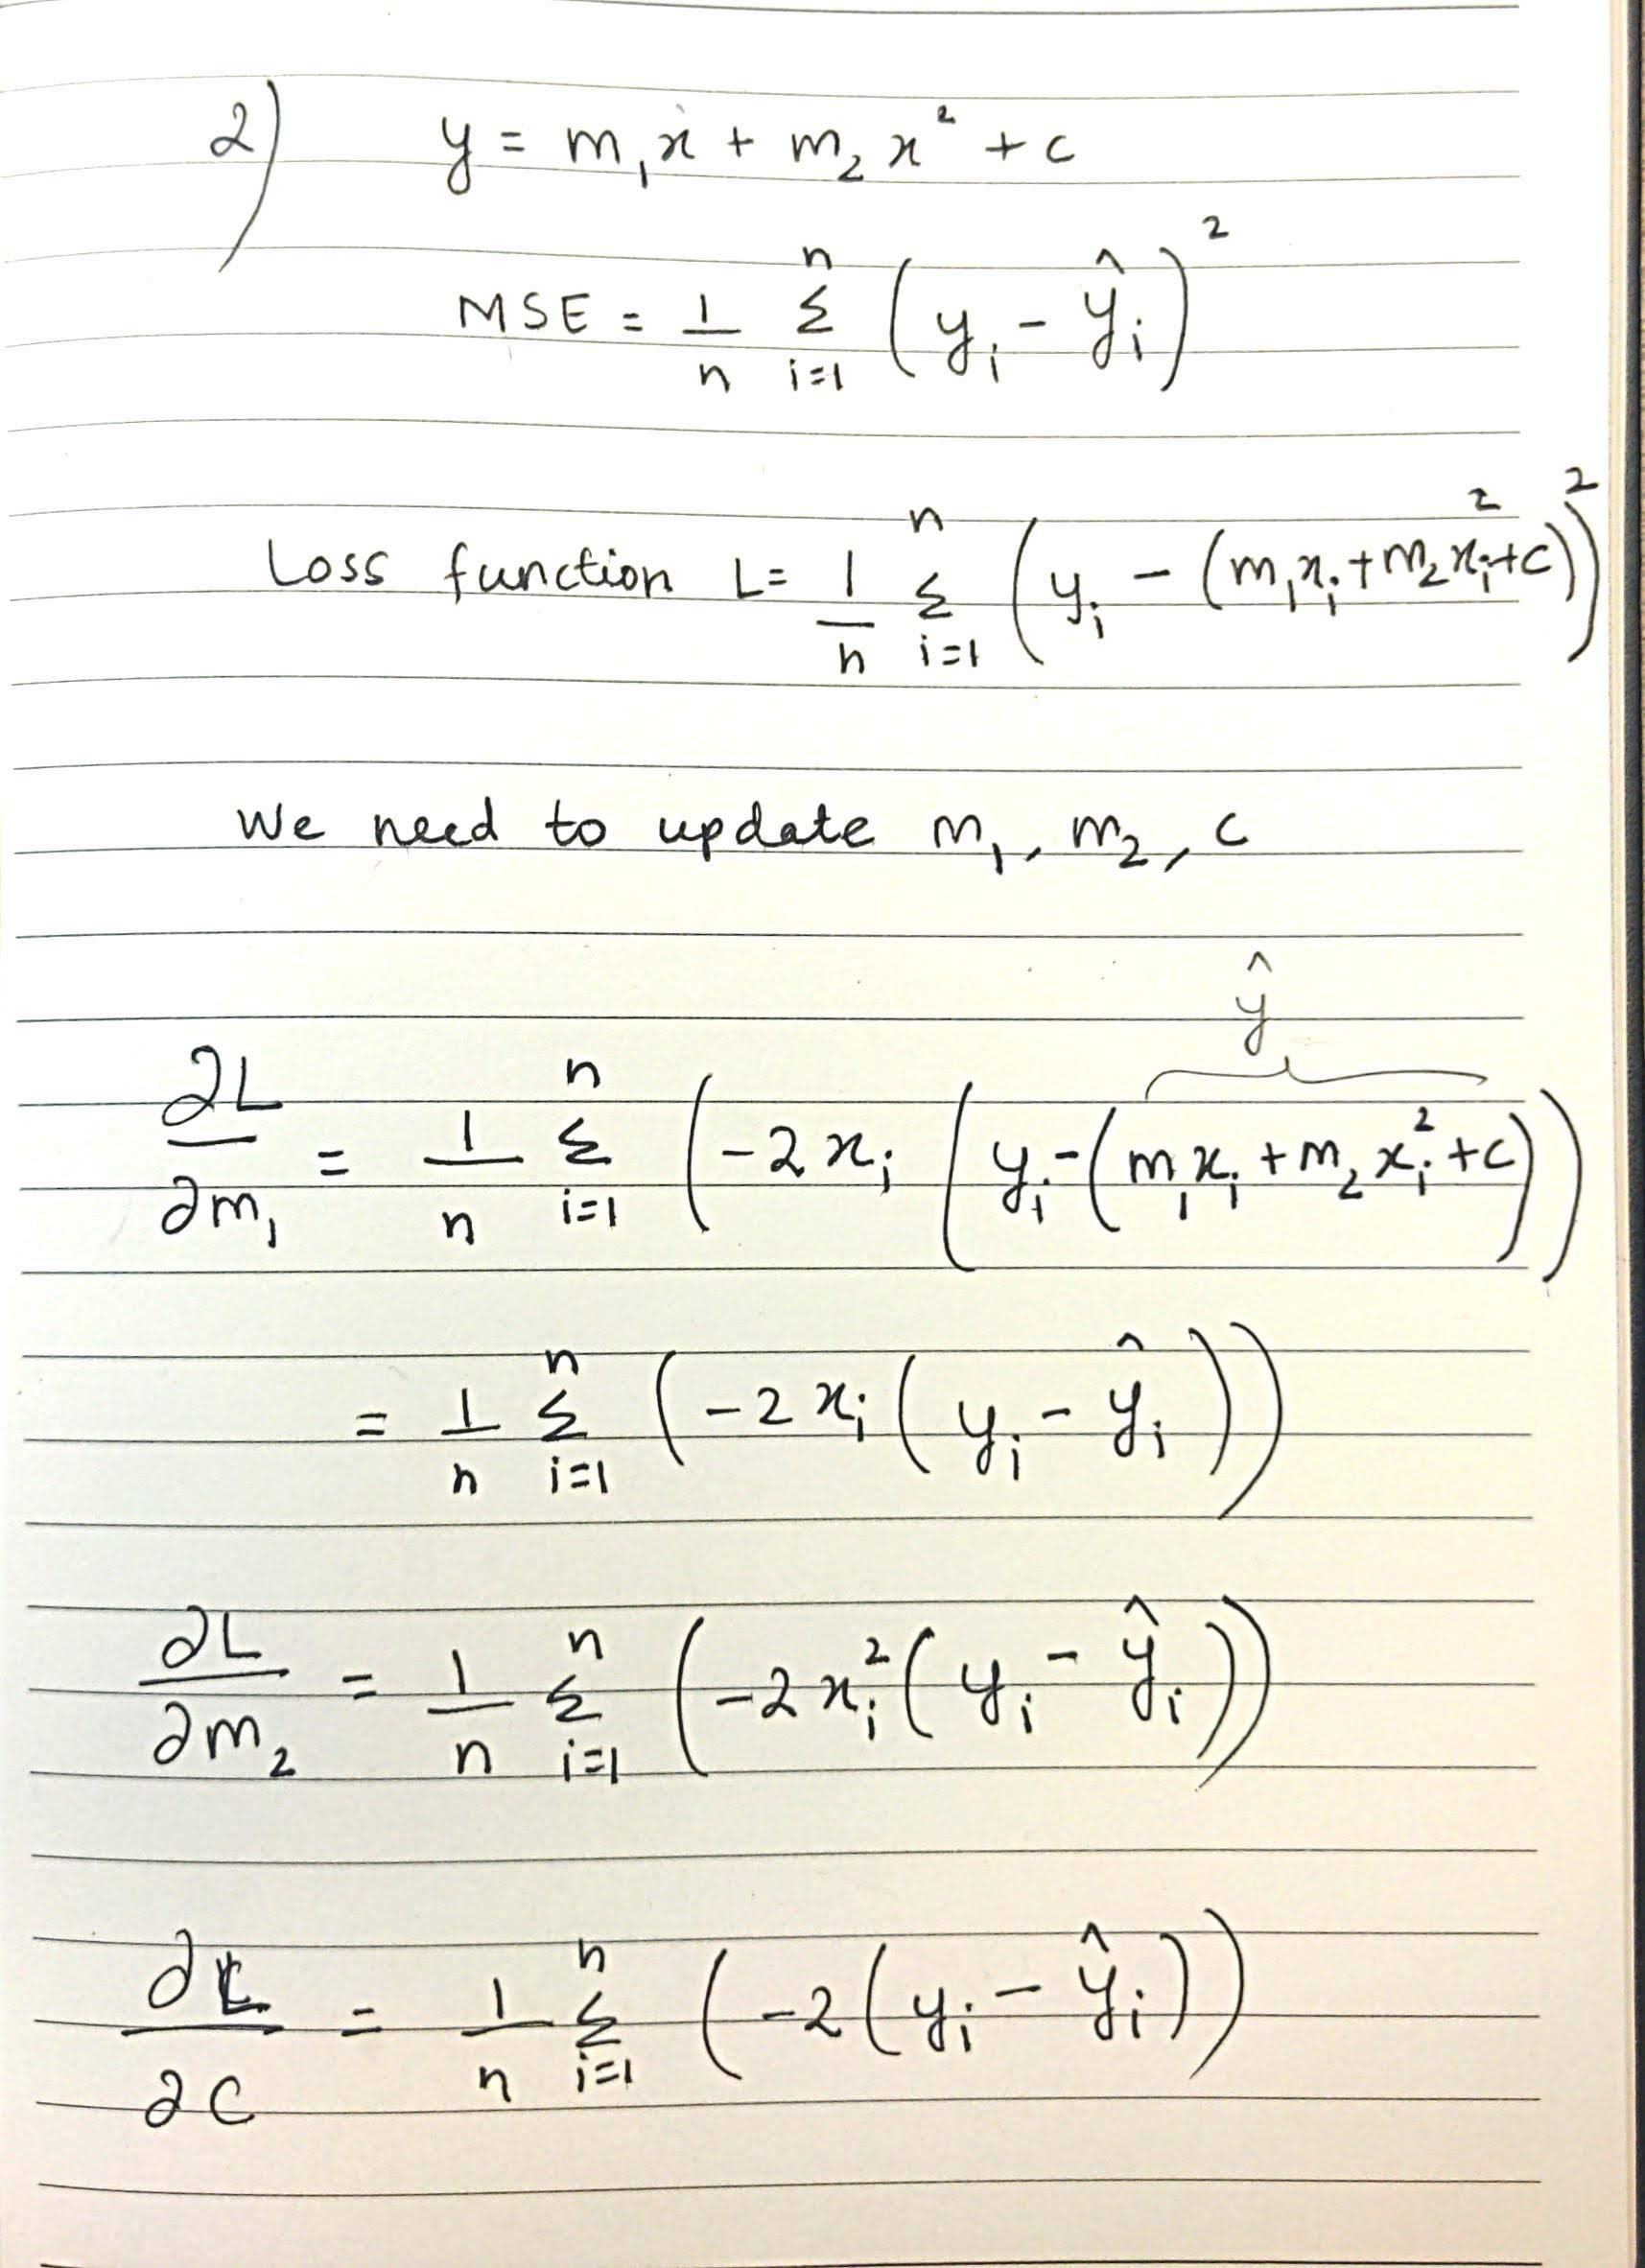

#### Computation for learning rate = 0.05

In [80]:
# Initialize weights and bias
m1 = 0.5
m2 = 0.5
c = 0.5

# number of iterations
iter = 100

# count of rows
n = 50

# learning rate
alpha = 0.05
# empty array for loss and iteration
iterarray , loss = [], []

for j in range(iter):
    
    # replicating calculation from above snippet
    yhat = m1*X + m2*(X**2)+ c
    # summation of derivative w.r.t 'm1'
    sigm1 = 0
    # summation of derivative w.r.t 'm1'
    sigm2 = 0
    # summation of derivative w.r.t 'c'
    sigc = 0
    for i in range(n):
        sigm1=sigm1+(-2*X[i]*(y[i]-yhat[i]))
        sigm2=sigm2+(-2*(X[i]**2)*(y[i]-yhat[i]))
        sigc=sigc+(-2*(y[i]-yhat[i]))
    # dL/dm1
    dLdm1 = (1/n)*sigm1
    # dL/dm1
    dLdm2 = (1/n)*sigm2
    # dL/dc
    dLdc = (1/n)*sigc
    # update weight and bias accordingly
    m1 = m1 - (alpha*dLdm1)
    m2 = m2 - (alpha*dLdm2)
    c = c - (alpha*dLdc)
    loss.append(MSE(y,yhat))
    iterarray.append(j)

print('MODEL PARAMETERS:')
print('weight m1:',m1,',weight m2:',m2,', bias c:',c)

MODEL PARAMETERS:
weight m1: 0.767410916944965 ,weight m2: 0.7063915768587414 , bias c: 0.9647343969831829


#### Computation for learning rate = 0.1

In [81]:
# Initialize weights and bias
m1 = 0.5
m2 = 0.5
c = 0.5

# number of iterations
iter = 100

# count of rows
n = 50

# learning rate
alpha = 0.1
# empty array for loss and iteration
iterarray , loss2 = [], []

for j in range(iter):
    
    # replicating calculation from above snippet
    yhat = m1*X + m2*(X**2)+ c
    # summation of derivative w.r.t 'm1'
    sigm1 = 0
    # summation of derivative w.r.t 'm1'
    sigm2 = 0
    # summation of derivative w.r.t 'c'
    sigc = 0
    for i in range(n):
        sigm1=sigm1+(-2*X[i]*(y[i]-yhat[i]))
        sigm2=sigm2+(-2*(X[i]**2)*(y[i]-yhat[i]))
        sigc=sigc+(-2*(y[i]-yhat[i]))
    # dL/dm1
    dLdm1 = (1/n)*sigm1
    # dL/dm1
    dLdm2 = (1/n)*sigm2
    # dL/dc
    dLdc = (1/n)*sigc
    # update weight and bias accordingly
    m1 = m1 - (alpha*dLdm1)
    m2 = m2 - (alpha*dLdm2)
    c = c - (alpha*dLdc)
    loss2.append(MSE(y,yhat))
    iterarray.append(j)

print('MODEL PARAMETERS:')
print('weight m1:',m1,',weight m2:',m2,', bias c:',c)

MODEL PARAMETERS:
weight m1: 0.7663300508765468 ,weight m2: 0.7224909285770366 , bias c: 0.9596045391628489


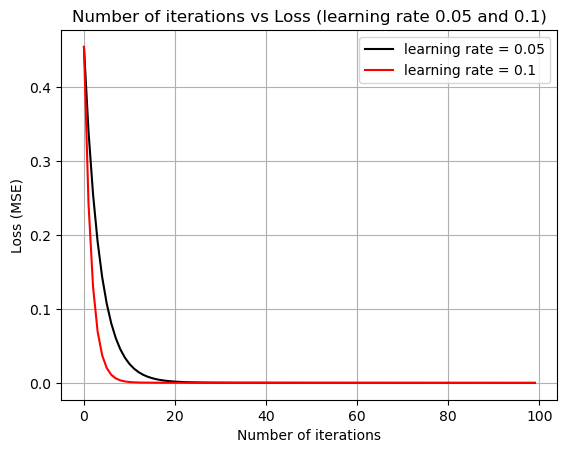

In [82]:
plt.plot(iterarray, loss, color='black',label='learning rate = 0.05')
plt.plot(iterarray, loss2, color='red',label='learning rate = 0.1')
# Add labels and a legend
plt.xlabel('Number of iterations')
plt.ylabel('Loss (MSE)')
plt.title('Number of iterations vs Loss (learning rate 0.05 and 0.1)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

 ### - Do steps 3-5 when the model is $y = \tanh(m*x + c)$ and the true parameters are $m = 1$ and $c = 2$. And $x \in (0,2)$. Also, plot the ground truth function.

#### Answer: 
Substituting gradient($m$) as 1 and intercept($c$) as 2 in equation $y = \tanh(m*x + c)$, we get $y = \tanh(x + 2)$.

#### Generating random data for function

In [237]:
# generating 100 random values for X in range 0 to 2

np.random.seed(1756)
X = np.random.uniform(0, 2, 100)
# apply function on X to find y
y = np.tanh(X+2)
# print few values in {X,y} data
for i in range(10):
    print('{',X[i],',',y[i],'}')

{ 0.4929429324183867 , 0.9864253223843175 }
{ 0.9825546141648944 , 0.9948796143652772 }
{ 1.7646031011566903 , 0.9989262478067065 }
{ 0.10259798678306398 , 0.970602818552307 }
{ 0.7684130286335911 , 0.9921528914163413 }
{ 1.6103715264155514 , 0.9985385509915348 }
{ 0.0661443883862951 , 0.9684146012163083 }
{ 0.28026596158570505 , 0.9793034228407609 }
{ 0.4159107375374562 , 0.9841821253804632 }
{ 1.727516089784987 , 0.9988436229045314 }


#### Plot ground truth function with random data generated

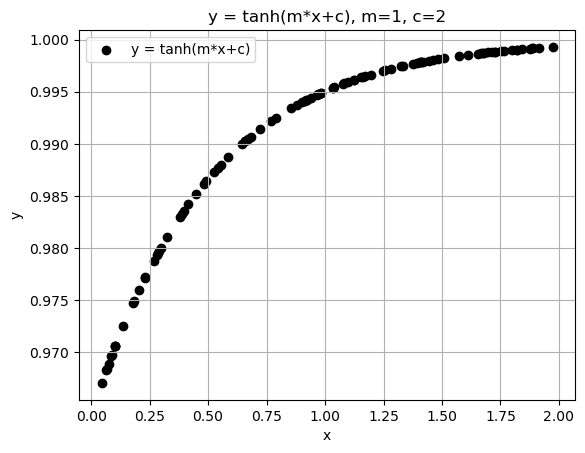

In [238]:
# Plot X vs y
plt.scatter(X, y, label='y = tanh(m*x+c)', color='black')

# Add labels and a legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = tanh(m*x+c), m=1, c=2')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#### Deriving formula for gradient

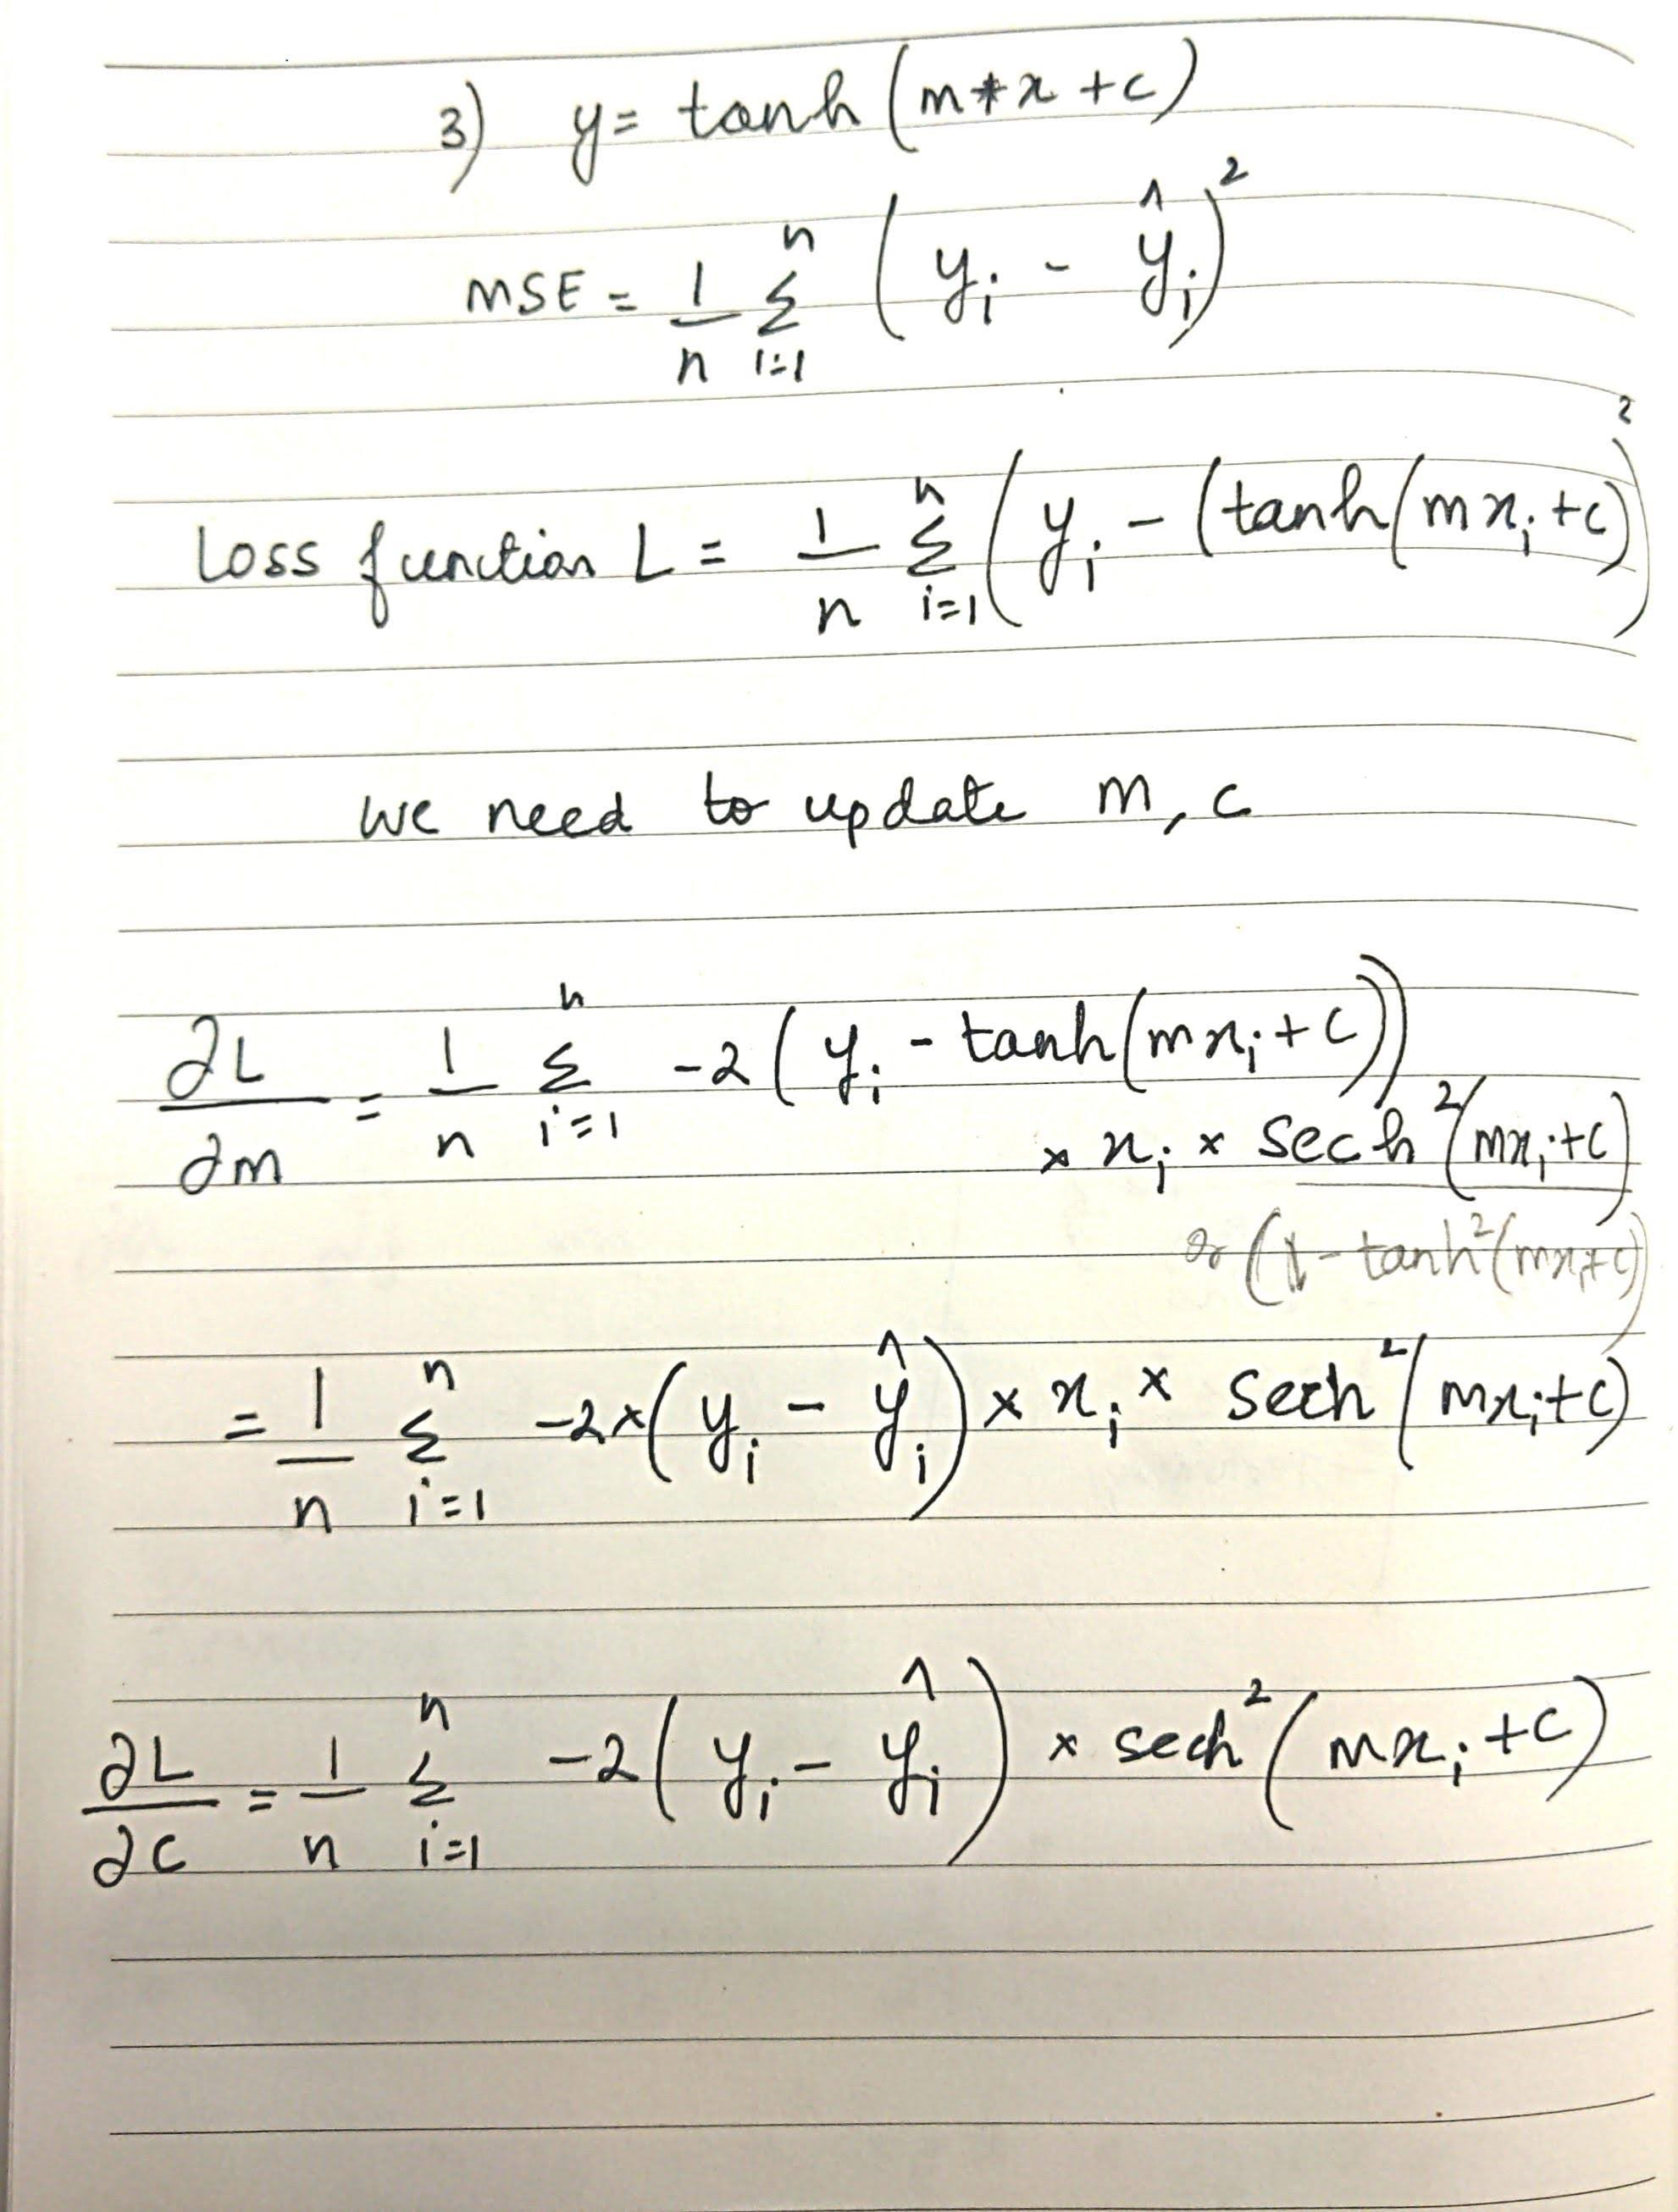

#### Computation for learning rate = 0.05

In [252]:
# Initialize weights and bias
m = 0.5
c = 0.5

# number of iterations
iter = 2000

# count of rows
n = 50

# learning rate
alpha = 0.05
# empty array for loss and iteration
iterarray , loss = [], []

for j in range(iter):
    
    # replicating calculation from above snippet
    yhat = np.tanh((m*X)+c)
    # summation of derivative w.r.t 'm'
    sigm = 0
    # summation of derivative w.r.t 'c'
    sigc = 0
    for i in range(n):
        sigm=sigm+(-2*X[i]*(y[i]-yhat[i])*(1-(np.tanh((m*X[i])+c)**2)))
        sigc=sigc+(-2*(y[i]-yhat[i])*(1-(np.tanh((m*X[i])+c)**2)))
    # dL/dm1
    dLdm = (1/n)*sigm
    # dL/dc
    dLdc = (1/n)*sigc
    # update weight and bias accordingly
    m = m - (alpha*dLdm)
    c = c - (alpha*dLdc)
    loss.append(MSE(y,yhat))
    iterarray.append(j)

print('MODEL PARAMETERS:')
print('weight m:',m, 'bias c:',c)

MODEL PARAMETERS:
weight m: 0.884917845650824 bias c: 1.6400498412375943


#### Computation for learning rate = 0.1

In [254]:
# Initialize weights and bias
m = 0.5
c = 0.5

# number of iterations
iter = 2000

# count of rows
n = 50

# learning rate
alpha = 0.1
# empty array for loss and iteration
iterarray , loss2 = [], []

for j in range(iter):
    
    # replicating calculation from above snippet
    yhat = np.tanh((m*X)+c)
    # summation of derivative w.r.t 'm'
    sigm = 0
    # summation of derivative w.r.t 'c'
    sigc = 0
    for i in range(n):
        sigm=sigm+(-2*X[i]*(y[i]-yhat[i])*(1-(np.tanh((m*X[i])+c)**2)))
        sigc=sigc+(-2*(y[i]-yhat[i])*(1-(np.tanh((m*X[i])+c)**2)))
    # dL/dm1
    dLdm = (1/n)*sigm
    # dL/dc
    dLdc = (1/n)*sigc
    # update weight and bias accordingly
    m = m - (alpha*dLdm)
    c = c - (alpha*dLdc)
    loss2.append(MSE(y,yhat))
    iterarray.append(j)

print('MODEL PARAMETERS:')
print('weight m:',m, 'bias c:',c)

MODEL PARAMETERS:
weight m: 0.916956619754065 bias c: 1.7668415612925512


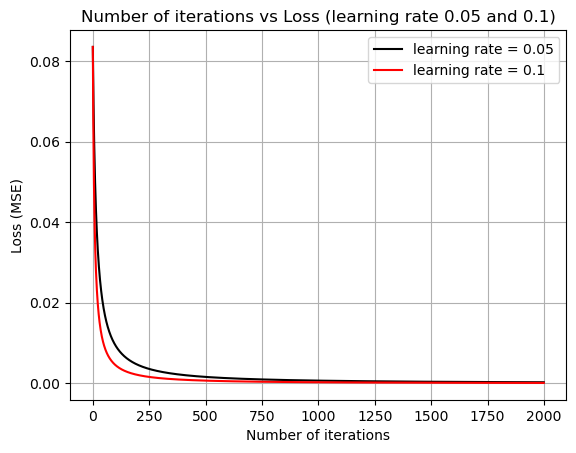

In [255]:
plt.plot(iterarray, loss, color='black',label='learning rate = 0.05')
plt.plot(iterarray, loss2, color='red',label='learning rate = 0.1')
# Add labels and a legend
plt.xlabel('Number of iterations')
plt.ylabel('Loss (MSE)')
plt.title('Number of iterations vs Loss (learning rate 0.05 and 0.1)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

## Classification Pipeline

### -Generate data from *Data\_Linear\_Classifier.ipynb*

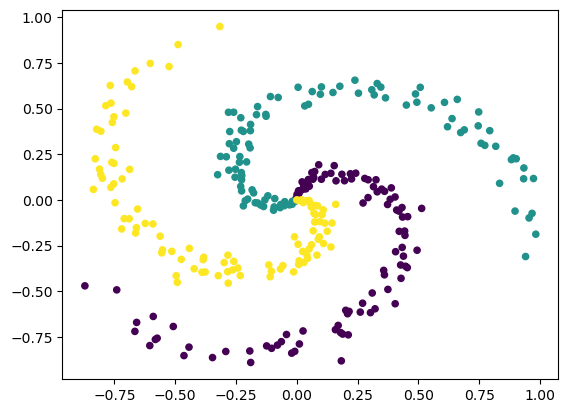

In [302]:
import numpy as np
import pickle

#Read data
X = pickle.load(open('dataX_assignment1.pickle','rb'))
y = pickle.load(open('dataY_assignment1.pickle','rb'))

#Plot the data
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.viridis)

In [303]:
print(X.shape)
print(y.shape)

(300, 2)
(300,)


### -  Split the data into test and train (20\%:80\%).

In [304]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1756)

### -  Build a linear classifier assuming the multiclass logistic loss and an $\ell_2$ regularization for the weights only. Report the prediction accuracy on the training data and the test data and show appropriate plots.

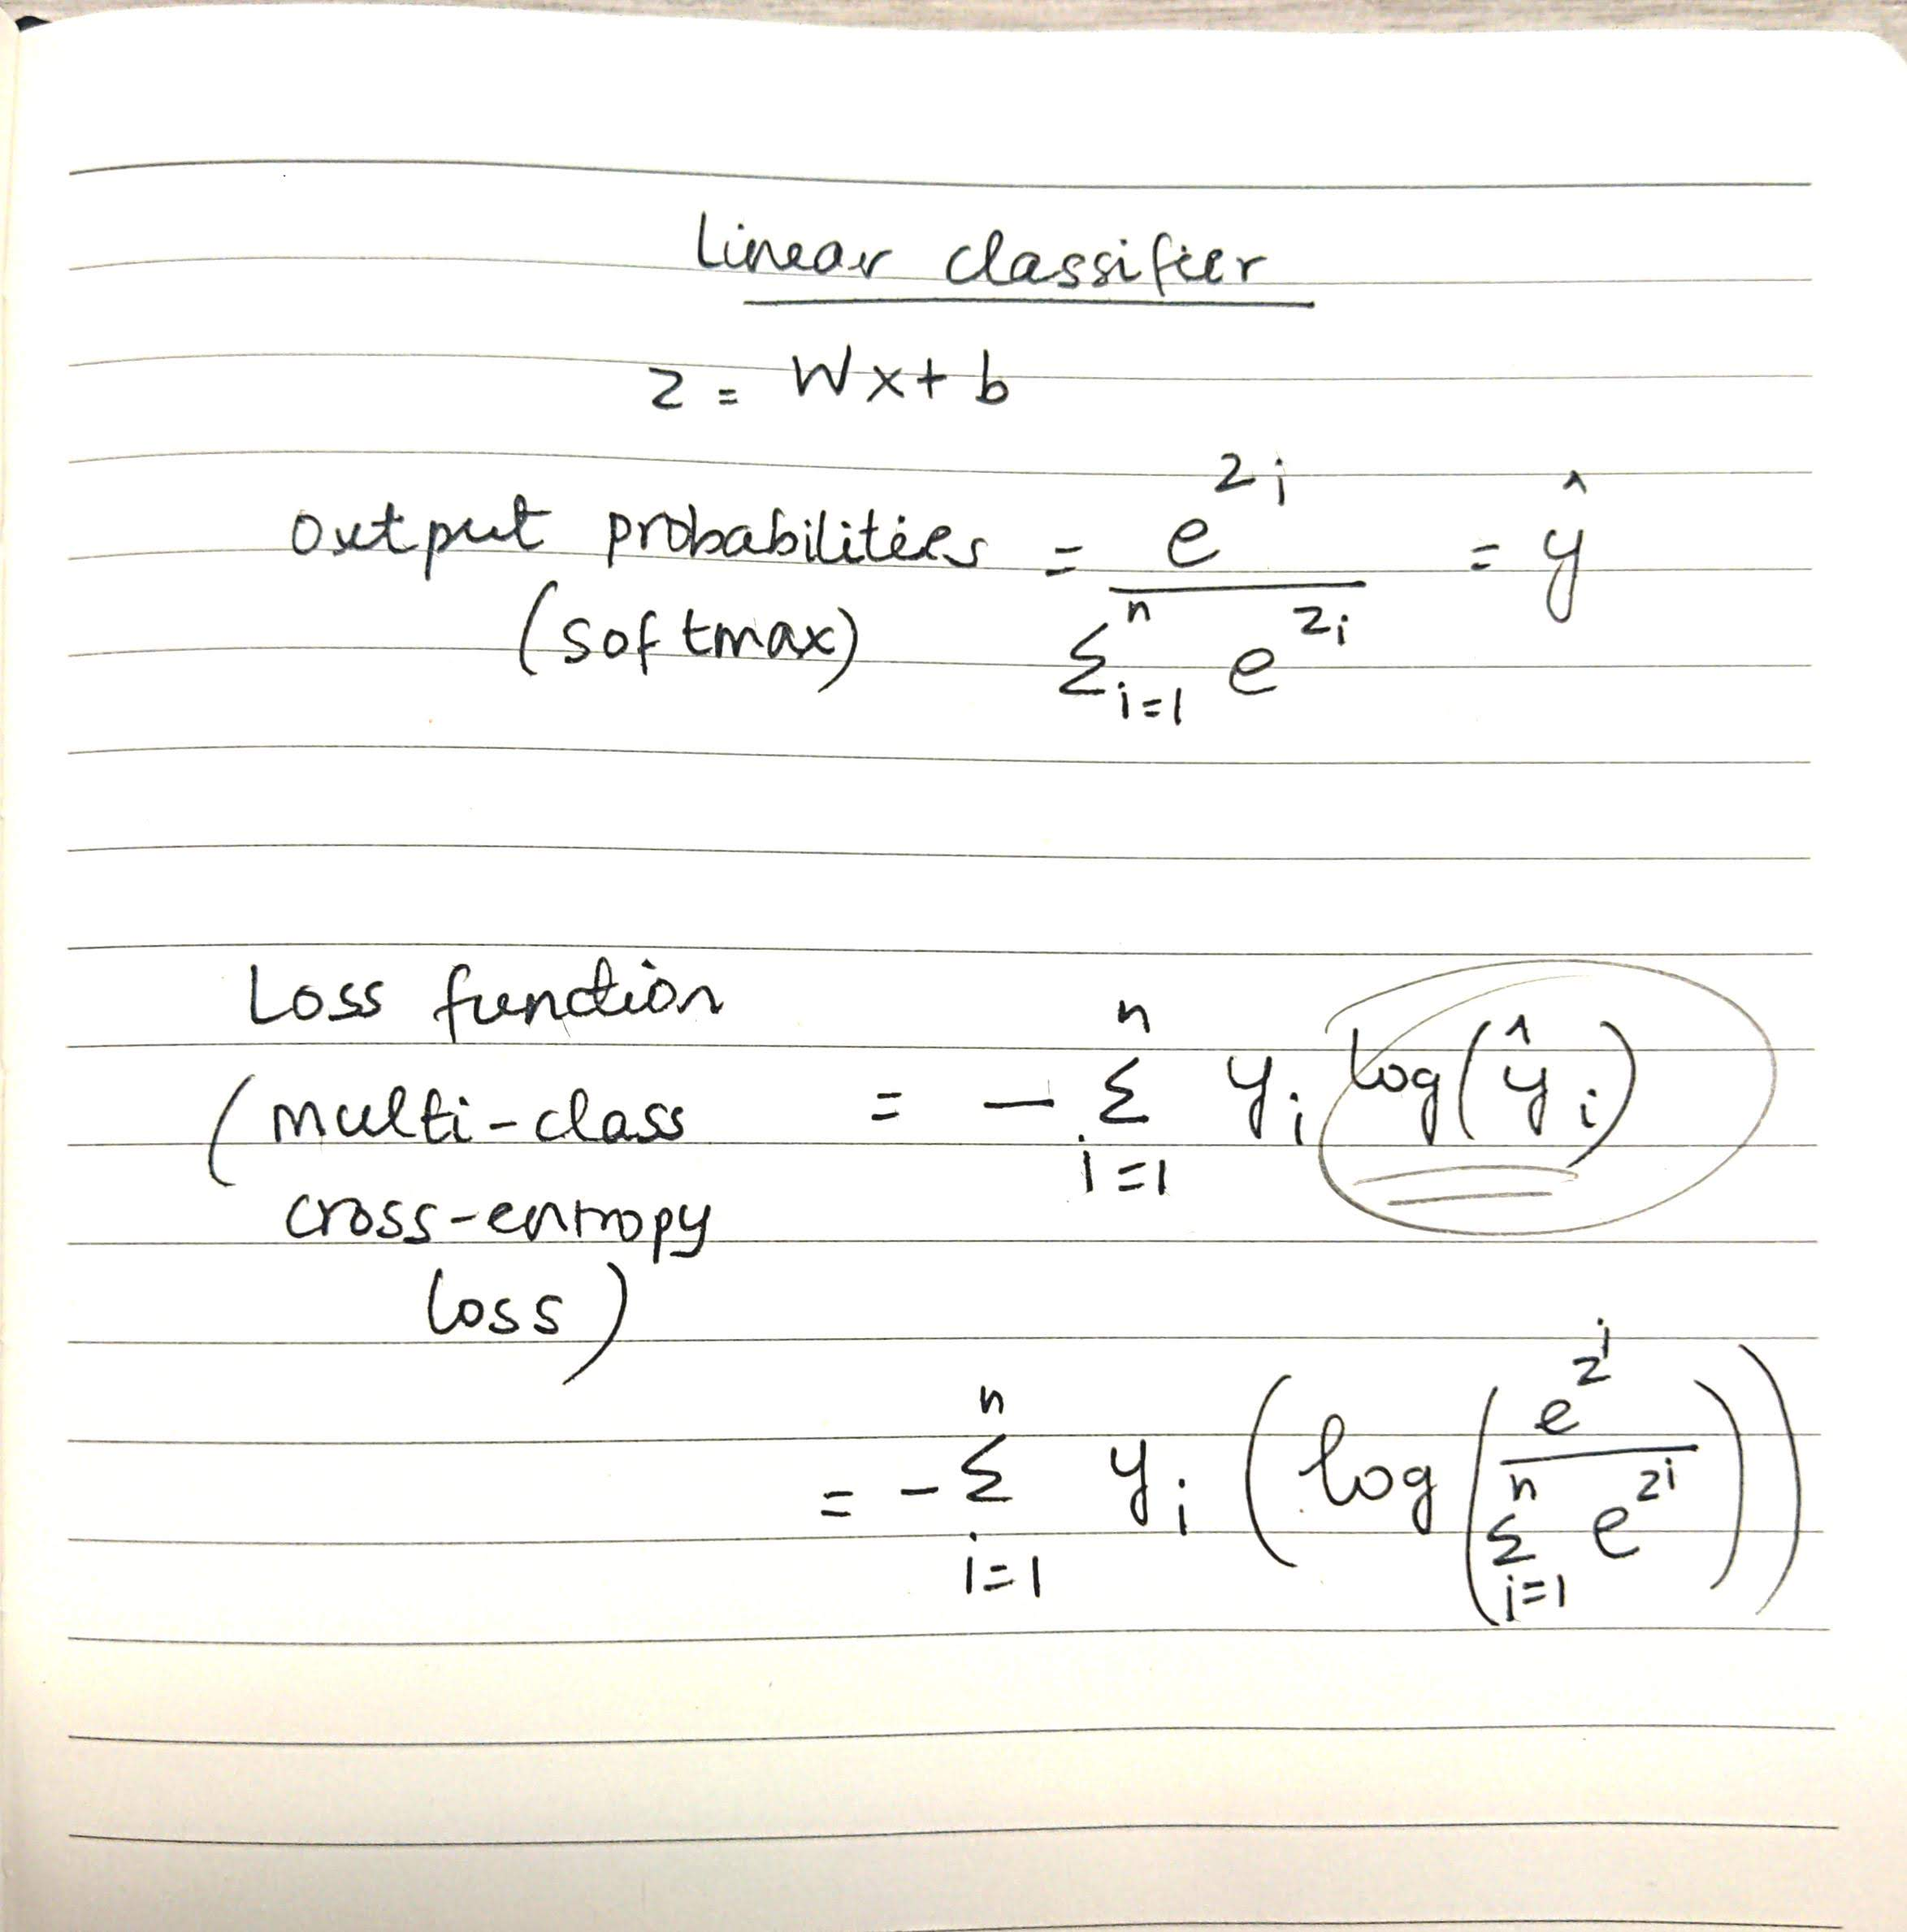

#### Gradient descent on the function

In [305]:
D = X_train.shape[1] 
K = max(y_train)+1 

# Initialize weight and bias
#W = 0.5
#b = 0.5
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# number of iterations
iter = 500

# count of rows
n = X_train.shape[0]

# learning rate
alpha = 0.1

# regularization
reg = 0.01

# step size
step_size = 1

for j in range(iter):
    
    z = np.dot(X_train, W) + b
    exp_z = np.exp(z)
    probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    # Loss function
    logprobs = -np.log(probs[range(n),y_train])
    # average of loss
    data_loss = np.sum(logprobs)/n
    # regularization loss
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    
    # compute gradient on probs
    dz = probs
    dz[range(n),y_train] -= 1
    dz /= n
    
    # backpropagate the gradient to the parameters (W,b)
    dW = np.dot(X_train.T, dz)
    db = np.sum(dz, axis=0, keepdims=True)

    dW += reg*W # regularization gradient

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    

In [306]:
# Evaluate training set accuracy

z = np.dot(X_train, W) + b
exp_z = np.exp(z)
probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
predicted_class = np.argmax(probs, axis=1)
print(np.mean(predicted_class == y_train))

0.5416666666666666


(-1.8890828209825332, 1.9479171790170442)

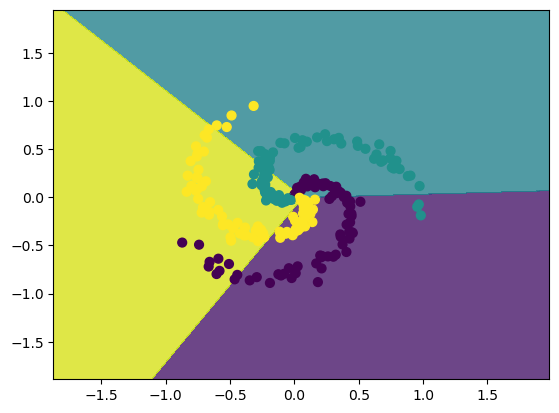

In [307]:
# Plot the resulting classifier - train set
h = 0.001
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.viridis)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [308]:
# Evaluate test set accuracy

z = np.dot(X_test, W) + b
exp_z = np.exp(z)
probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
predicted_class = np.argmax(probs, axis=1)
print(np.mean(predicted_class == y_test))

0.6


(-1.8282390549231748, 1.6357609450764437)

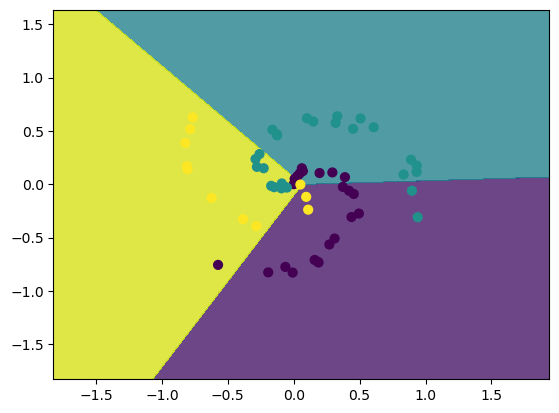

In [309]:
# Plot the resulting classifier - train set
h = 0.001
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap=plt.cm.viridis)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

 ### -  Introduce a cross validation scheme and justify your choice of parameters. What is the validation accuracy compare to the test accuracy.

#### Performing k-fold cross validation during the training process with 10 folds. This will expose the model to different groups on data, and hence may perform much better on the test data

In [310]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=1756)

In [315]:
# Create a list to store validation accuracies
validation_accuracies = []


# learning rate
alpha = 0.1
# regularization
reg = 0.01
# step size
step_size = 1
# number of iterations
iter = 500

counter = 0
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # W and b should be initialized only once
    if(counter==0):
        D = X_train.shape[1] 
        K = max(y_train)+1 
        # Initialize weight and bias
        W = 0.01 * np.random.randn(D,K)
        b = np.zeros((1,K))
        # count of rows
        n = X_train.shape[0]
        

    for j in range(iter):

        z = np.dot(X_train, W) + b
        exp_z = np.exp(z)
        probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)

        # Loss function
        logprobs = -np.log(probs[range(n),y_train])
        # average of loss
        data_loss = np.sum(logprobs)/n
        # regularization loss
        reg_loss = 0.5*reg*np.sum(W*W)
        loss = data_loss + reg_loss

        # compute gradient on probs
        dz = probs
        dz[range(n),y_train] -= 1
        dz /= n

        # backpropagate the gradient to the parameters (W,b)
        dW = np.dot(X_train.T, dz)
        db = np.sum(dz, axis=0, keepdims=True)

        dW += reg*W # regularization gradient

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        

    counter=counter+1
    
    # After training, evaluate on the validation set
    z_temp = np.dot(X_val, W) + b
    exp_z_temp = np.exp(z_temp)
    probs_temp = exp_z_temp / np.sum(exp_z_temp, axis=1, keepdims=True)
    predicted_class = np.argmax(probs_temp, axis=1)
    val_accuracy=np.mean(predicted_class == y_val)
    # Store the validation accuracy for this fold
    validation_accuracies.append(val_accuracy)
    print('Validation accuracy - split ',counter,':',val_accuracy) 

# Calculate the average validation accuracy across all folds
average_validation_accuracy = np.mean(validation_accuracies)

print("Average Validation Accuracy:", average_validation_accuracy)


Validation accuracy - split  1 : 0.5
Validation accuracy - split  2 : 0.6666666666666666
Validation accuracy - split  3 : 0.4666666666666667
Validation accuracy - split  4 : 0.5666666666666667
Validation accuracy - split  5 : 0.5
Validation accuracy - split  6 : 0.4666666666666667
Validation accuracy - split  7 : 0.4666666666666667
Validation accuracy - split  8 : 0.5333333333333333
Validation accuracy - split  9 : 0.5
Validation accuracy - split  10 : 0.7
Average Validation Accuracy: 0.5366666666666666


In [316]:
# Evaluate test set accuracy

z = np.dot(X_test, W) + b
exp_z = np.exp(z)
probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
predicted_class = np.argmax(probs, axis=1)
print(np.mean(predicted_class == y_test))

0.5833333333333334


#### Performing cross validation and making the model used to different 'folds' of the training data has reduced the test accuracy  - which means that our model has become less sensitive to random splits and can handle real world data better

###  -  What is the sensitivity of the model's performance to different learning rates and the number of gradient descent iterations. Describe via suitable plots

#### Sensitivity to learning rates

In [317]:
# recreate after k-fold CV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1756)

In [318]:
# initializing a few values to iterate through
learning_rates = [0.001,0.005, 0.01,0.05, 0.1,0.5, 1,5, 10]
accuracies = []
for i, step_size in enumerate(learning_rates):
    
    D = X_train.shape[1] 
    K = max(y_train)+1 
    # Initialize weight and bias
    W = 0.01 * np.random.randn(D,K)
    b = np.zeros((1,K))
    # number of iterations
    iter = 500
    # count of rows
    n = X_train.shape[0]
    # learning rate
    alpha = 0.1
    # regularization
    reg = 0.01
    for j in range(iter):

        z = np.dot(X_train, W) + b
        exp_z = np.exp(z)
        probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        # Loss function
        logprobs = -np.log(probs[range(n),y_train])
        # average of loss
        data_loss = np.sum(logprobs)/n
        # regularization loss
        reg_loss = 0.5*reg*np.sum(W*W)
        loss = data_loss + reg_loss
        # compute gradient on probs
        dz = probs
        dz[range(n),y_train] -= 1
        dz /= n
        # backpropagate the gradient to the parameters (W,b)
        dW = np.dot(X_train.T, dz)
        db = np.sum(dz, axis=0, keepdims=True)
        dW += reg*W # regularization gradient
        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
    
    z = np.dot(X_test, W) + b
    exp_z = np.exp(z)
    probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
    predicted_class = np.argmax(probs, axis=1)
    accuracies.append(np.mean(predicted_class == y_test))


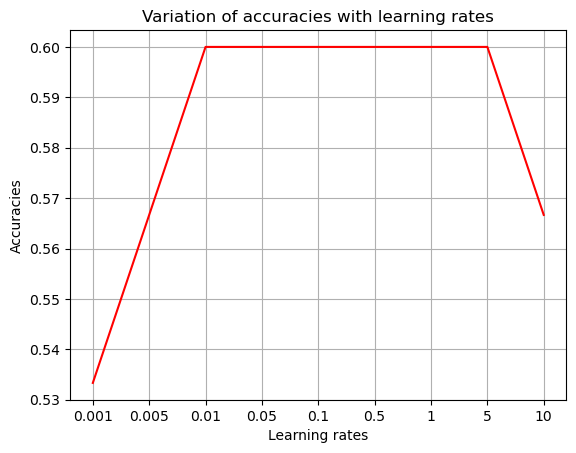

In [319]:
learning_rates_labels = ['0.001','0.005', '0.01','0.05', '0.1','0.5', '1','5', '10']
plt.plot(learning_rates_labels, accuracies, color='red')
# Add labels and a legend
plt.xlabel('Learning rates')
plt.ylabel('Accuracies')
plt.title('Variation of accuracies with learning rates')
# Show the plot
plt.grid(True)
plt.show()

#### We see that the model performs well when the accuracy rate is between 0.01 and 5 and drops afterwards. The reason for this is that very low learning rates (like 0.001) are too small for the model to converge effectively, and may take a huge number of epochs to train effectively. High learning rates on the other hand make the model learn quickly but are not good enough to capture patterns due to overshooting

#### Sensitivity to gradient descent iterations

In [320]:
# initializing a few values to iterate through
iterations = [1,3,5,7,10,50,100,500,1000,10000]
accuracies = []
for i, iter in enumerate(iterations):
    
    D = X_train.shape[1] 
    K = max(y_train)+1 
    # Initialize weight and bias
    W = 0.01 * np.random.randn(D,K)
    b = np.zeros((1,K))
    # count of rows
    n = X_train.shape[0]
    # learning rate
    alpha = 0.1
    # regularization
    reg = 0.01
    # learning rates
    step_size=1
    for j in range(iter):

        z = np.dot(X_train, W) + b
        exp_z = np.exp(z)
        probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        # Loss function
        logprobs = -np.log(probs[range(n),y_train])
        # average of loss
        data_loss = np.sum(logprobs)/n
        # regularization loss
        reg_loss = 0.5*reg*np.sum(W*W)
        loss = data_loss + reg_loss
        # compute gradient on probs
        dz = probs
        dz[range(n),y_train] -= 1
        dz /= n
        # backpropagate the gradient to the parameters (W,b)
        dW = np.dot(X_train.T, dz)
        db = np.sum(dz, axis=0, keepdims=True)
        dW += reg*W # regularization gradient
        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
    z = np.dot(X_test, W) + b
    exp_z = np.exp(z)
    probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
    predicted_class = np.argmax(probs, axis=1)
    accuracies.append(np.mean(predicted_class == y_test))


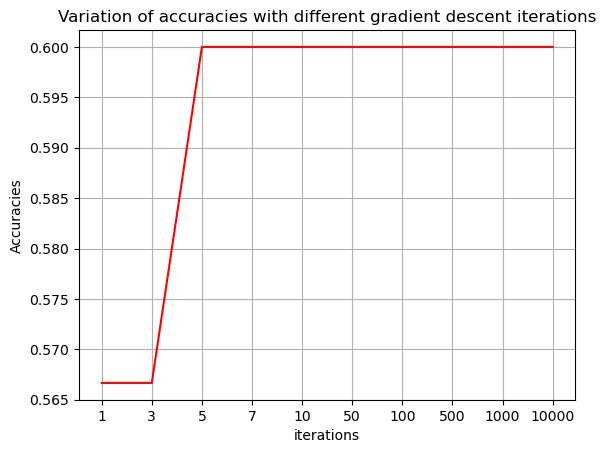

In [321]:
iteration_labels = ['1','3','5','7','10','50','100','500','1000','10000']
plt.plot(iteration_labels, accuracies, color='red')
# Add labels and a legend
plt.xlabel('iterations')
plt.ylabel('Accuracies')
plt.title('Variation of accuracies with different gradient descent iterations')
# Show the plot
plt.grid(True)
plt.show()

#### Accuracies seem to stabilize after a certain number of iterations (5 in our case). Beyond that, there is not any performance improvement - the model may even start 'memorizing' the data

### -  What is the sensitivity of the model's performance to different regularization parameter values. Find the best regularization parameter using an exhaustive search procedure. Describe your choice via suitable plots. What is the performance difference between using regularization and no regularization?

In [322]:
# initializing a few values to iterate through
regularization = [0,0.001,0.01,0.05,0.1,0.5,1]
accuracies = []
for i, reg in enumerate(regularization):
    
    D = X_train.shape[1] 
    K = max(y_train)+1 
    # Initialize weight and bias
    W = 0.01 * np.random.randn(D,K)
    b = np.zeros((1,K))
    # count of rows
    n = X_train.shape[0]
    # learning rate
    alpha = 0.1
    # number of iterations
    iter = 500
    # learning rates
    step_size=1
    for j in range(iter):

        z = np.dot(X_train, W) + b
        exp_z = np.exp(z)
        probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        # Loss function
        logprobs = -np.log(probs[range(n),y_train])
        # average of loss
        data_loss = np.sum(logprobs)/n
        # regularization loss
        reg_loss = 0.5*reg*np.sum(W*W)
        loss = data_loss + reg_loss
        # compute gradient on probs
        dz = probs
        dz[range(n),y_train] -= 1
        dz /= n
        # backpropagate the gradient to the parameters (W,b)
        dW = np.dot(X_train.T, dz)
        db = np.sum(dz, axis=0, keepdims=True)
        dW += reg*W # regularization gradient
        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
    z = np.dot(X_test, W) + b
    exp_z = np.exp(z)
    probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
    predicted_class = np.argmax(probs, axis=1)
    accuracies.append(np.mean(predicted_class == y_test))


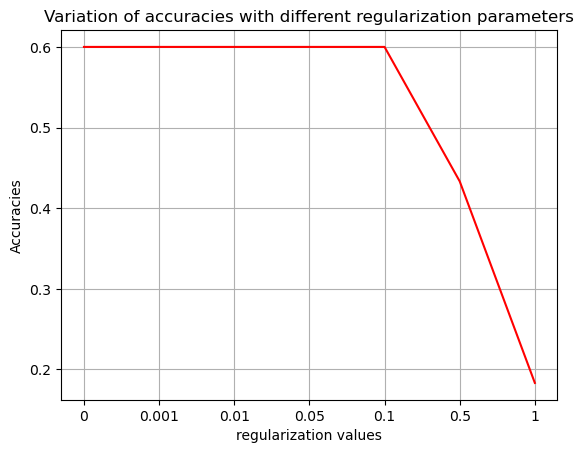

In [323]:
regularization_labels = ['0','0.001','0.01','0.05','0.1','0.5','1']
plt.plot(regularization_labels, accuracies, color='red')
# Add labels and a legend
plt.xlabel('regularization values')
plt.ylabel('Accuracies')
plt.title('Variation of accuracies with different regularization parameters')
# Show the plot
plt.grid(True)
plt.show()

#### No L2 regularization does not affect our model performance - but in general, it is advisable to apply some form of regularization / learning brakes so that the model does not memorize the training data. Beyond 0.1, we see that the model is not able to effectively capture patterns as it is too constrained by regularization

### What is the sensitivity of the model's performance with respect to different test train splits (e.g., 50\%:50\%, 40\%:60\%, 30\%:70\%,).

In [324]:
X_train_40, X_test_40, y_train_40, y_test_40 = train_test_split(X, y, test_size=0.6, random_state=1756)
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X, y, test_size=0.5, random_state=1756)
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X, y, test_size=0.4, random_state=1756)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=1756)
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=1756)

In [325]:
# initializing a few values to iterate through
train_iter = [[X_train_40,y_train_40,X_test_40,y_test_40],[X_train_50,y_train_50,X_test_50,y_test_50],[X_train_60,y_train_60,X_test_60,y_test_60], [X_train_70,y_train_70,X_test_70,y_test_70], [X_train_80,y_train_80,X_test_80,y_test_80]]
accuracies = []
for i, tr_it in enumerate(train_iter):
    D = tr_it[0].shape[1] 
    K = max(tr_it[1])+1 
    # Initialize weight and bias
    W = 0.01 * np.random.randn(D,K)
    b = np.zeros((1,K))
    # count of rows
    n = tr_it[0].shape[0]
    # learning rate
    alpha = 0.1
    # number of iterations
    iter = 500
    # learning rates
    step_size=1
    # regularization
    reg = 0.01
    for j in range(iter):

        z = np.dot(tr_it[0], W) + b
        exp_z = np.exp(z)
        probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        # Loss function
        logprobs = -np.log(probs[range(n),tr_it[1]])
        # average of loss
        data_loss = np.sum(logprobs)/n
        # regularization loss
        reg_loss = 0.5*reg*np.sum(W*W)
        loss = data_loss + reg_loss
        # compute gradient on probs
        dz = probs
        dz[range(n),tr_it[1]] -= 1
        dz /= n
        # backpropagate the gradient to the parameters (W,b)
        dW = np.dot(tr_it[0].T, dz)
        db = np.sum(dz, axis=0, keepdims=True)
        dW += reg*W # regularization gradient
        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        
    z = np.dot(tr_it[2], W) + b
    exp_z = np.exp(z)
    probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
    predicted_class = np.argmax(probs, axis=1)
    accuracies.append(np.mean(predicted_class == tr_it[3]))

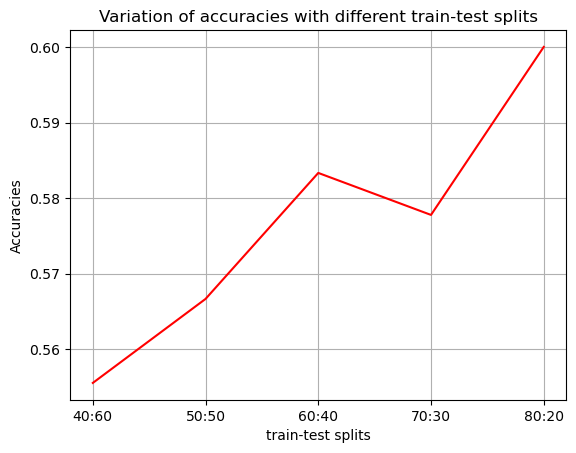

In [326]:
split_labels = ['40:60','50:50','60:40','70:30','80:20']
plt.plot(split_labels, accuracies, color='red')
# Add labels and a legend
plt.xlabel('train-test splits')
plt.ylabel('Accuracies')
plt.title('Variation of accuracies with different train-test splits')
# Show the plot
plt.grid(True)
plt.show()

#### Our dataset has 300 rows - for this, a 60:40 split seems to work decently for the linear classifier we trained. Below this, we see that the model is unable to predict well on the test set. On the other hand, the 80:20 split seems to be the best option - but we have very less data to test the model on, and may not always perform this well especially if the test set varies a lot from the training set.

### 4. Feedforward Neural Networks (30 points)

### - Build classifiers using _Keras_ and _Tensorflow_ and solve the classification problem for [MNIST/Fashion MNIST](https://www.tensorflow.org/tutorials/keras/classification?hl=lv).

In [220]:
#pre-process data

from keras.datasets import mnist
import numpy as np

# fetch the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# vectorize the images to 784-dim vectors
x_train_vec = x_train.reshape(60000, 784)
x_test_vec = x_test.reshape(10000, 784)

# apply OHE on target 
def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of x_train_vec is: ' + str(x_train_vec.shape))
print('Shape of x_test_vec is: ' + str(x_test_vec.shape))
print('Shape of y_train_vec is ' + str(y_train_vec.shape))
print('Shape of y_test_vec is ' + str(y_test_vec.shape))


Shape of x_train_vec is: (60000, 784)
Shape of x_test_vec is: (10000, 784)
Shape of y_train_vec is (60000, 10)
Shape of y_test_vec is (10000, 10)


#### (a) a 2-layer feedforward neural network (i.e., 1 hidden layer with $f(x,W_1,b_1,W_2,b_2) = W_2\max(0,W_1x+b_1) + b_2$)

- The output of the hidden layer is $max(0,W_1x+b_1)$ which represents a linear function with ReLU activation
- The previous layer output is represented as $W_2*x_1 + b_2$  - this can be converted into classification probabilities using a softmax function

In [221]:
from keras import models
from keras import layers

model_relu = models.Sequential()
model_relu.add(layers.Dense(1000, activation='relu', input_shape=(784,)))
model_relu.add(layers.Dense(10, activation='softmax'))

# print the summary of the model.
model_relu.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1000)              785000    
                                                                 
 dense_11 (Dense)            (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [222]:
from keras import optimizers
model_relu.compile(optimizers.RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_relu.fit(x_train_vec, y_train_vec, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 10s 25ms/step - loss: 7.8384 - accuracy: 0.8957 - val_loss: 1.6261 - val_accuracy: 0.9259
Epoch 2/20
375/375 [==============================] - 9s 23ms/step - loss: 0.8156 - accuracy: 0.9555 - val_loss: 0.9302 - val_accuracy: 0.9533
Epoch 3/20
375/375 [==============================] - 9s 24ms/step - loss: 0.5713 - accuracy: 0.9662 - val_loss: 0.8351 - val_accuracy: 0.9609
Epoch 4/20
375/375 [==============================] - 10s 25ms/step - loss: 0.4509 - accuracy: 0.9728 - val_loss: 0.8883 - val_accuracy: 0.9649
Epoch 5/20
375/375 [==============================] - 9s 23ms/step - loss: 0.3960 - accuracy: 0.9771 - val_loss: 1.0722 - val_accuracy: 0.9621
Epoch 6/20
375/375 [==============================] - 9s 24ms/step - loss: 0.3783 - accuracy: 0.9800 - val_loss: 1.0616 - val_accuracy: 0.9657
Epoch 7/20
375/375 [==============================] - 9s 24ms/step - loss: 0.3473 - accuracy: 0.9821 - val_loss: 1.1181 - val_accuracy: 0.96

In [223]:
test_loss, test_acc = model_relu.evaluate(x_test_vec, y_test_vec)
print(f'Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 2s 7ms/step - loss: 1.2052 - accuracy: 0.9764
Test accuracy: 0.9764


#### (b) same as before but with leaky ReLU ($f(x) = x$ if  $x > 0$, else $ f(x) = 0.01*x$)

In [224]:
import tensorflow as tf
model_Lrelu = models.Sequential()
model_Lrelu.add(layers.Dense(1000,activation=tf.keras.layers.LeakyReLU(alpha=0.2), input_shape=(784,)))
model_Lrelu.add(layers.Dense(10, activation='softmax'))

# print the summary of the model.
model_Lrelu.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1000)              785000    
                                                                 
 dense_13 (Dense)            (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [225]:
model_Lrelu.compile(optimizers.RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_Lrelu.fit(x_train_vec, y_train_vec, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 11s 27ms/step - loss: 15.7663 - accuracy: 0.8610 - val_loss: 4.7128 - val_accuracy: 0.9255
Epoch 2/20
375/375 [==============================] - 9s 24ms/step - loss: 4.9082 - accuracy: 0.9252 - val_loss: 6.6752 - val_accuracy: 0.9078
Epoch 3/20
375/375 [==============================] - 10s 26ms/step - loss: 3.1898 - accuracy: 0.9391 - val_loss: 5.5772 - val_accuracy: 0.8907
Epoch 4/20
375/375 [==============================] - 10s 27ms/step - loss: 2.4146 - accuracy: 0.9473 - val_loss: 3.3220 - val_accuracy: 0.9402
Epoch 5/20
375/375 [==============================] - 10s 26ms/step - loss: 1.9438 - accuracy: 0.9538 - val_loss: 3.1803 - val_accuracy: 0.9364
Epoch 6/20
375/375 [==============================] - 9s 25ms/step - loss: 1.6730 - accuracy: 0.9586 - val_loss: 2.2399 - val_accuracy: 0.9551
Epoch 7/20
375/375 [==============================] - 10s 26ms/step - loss: 1.5554 - accuracy: 0.9616 - val_loss: 2.4271 - val_accuracy: 

In [226]:
test_loss, test_acc = model_Lrelu.evaluate(x_test_vec, y_test_vec)
print(f'Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 2s 6ms/step - loss: 2.3239 - accuracy: 0.9619
Test accuracy: 0.9619


#### Using Leaky ReLU does not provide any significant advantage with MNIST data

### - Discuss how optimizer choice influences performance.

In [231]:
from keras import optimizers
optimizers = [optimizers.RMSprop(learning_rate=0.01),optimizers.Adam(learning_rate=0.01),optimizers.SGD(learning_rate=0.01),optimizers.Nadam(learning_rate=0.01)]

for i, opt in enumerate(optimizers):
    
    model_temp = models.Sequential()
    model_temp.add(layers.Dense(1000, activation='relu', input_shape=(784,)))
    model_temp.add(layers.Dense(10, activation='softmax'))
    
    model_temp.compile(opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model_temp.fit(x_train_vec, y_train_vec, batch_size=128, epochs=5, validation_split=0.2)
    test_loss, test_acc = model_temp.evaluate(x_test_vec, y_test_vec)
    print('Test accuracy of ',opt, f' is: {test_acc:.4f}')

Epoch 1/5
375/375 [==============================] - 11s 27ms/step - loss: 36.6440 - accuracy: 0.7772 - val_loss: 0.8859 - val_accuracy: 0.8313
Epoch 2/5
375/375 [==============================] - 10s 26ms/step - loss: 1.5155 - accuracy: 0.8098 - val_loss: 1.1507 - val_accuracy: 0.8313
Epoch 3/5
375/375 [==============================] - 10s 26ms/step - loss: 1.2697 - accuracy: 0.8215 - val_loss: 1.0413 - val_accuracy: 0.8033
Epoch 4/5
375/375 [==============================] - 9s 25ms/step - loss: 1.2084 - accuracy: 0.8207 - val_loss: 1.1643 - val_accuracy: 0.8195
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 1.3793 - accuracy: 0.8173
Test accuracy of  <keras.optimizers.legacy.rmsprop.RMSprop object at 0x000001C7178DF460>  is: 0.8173
Epoch 1/5
375/375 [==============================] - 7s 18ms/step - loss: 10.0606 - accuracy: 0.8479 - val_loss: 0.4779 - val_accuracy: 0.8913
Epoch 2/5
375/375 [==============================] - 7s 18ms/step - loss: 0.4173 - ac

#### SGD performs better than Nadam / Adam in 5 iterations. This could be because Adam focuses more on computational efficiency and converging faster. If our dataset is huge and requires more iterations to train, then SGD may not be the right optimizer even though it provides better accuracy

### -What happens when the number of hidden units chosen is much smaller?

In [234]:
from keras import optimizers
model_temp = models.Sequential()
model_temp.add(layers.Dense(5, activation='relu', input_shape=(784,)))
model_temp.add(layers.Dense(10, activation='softmax'))
    
model_temp.compile(optimizers.RMSprop(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
history = model_temp.fit(x_train_vec, y_train_vec, batch_size=128, epochs=10, validation_split=0.2)
test_loss, test_acc = model_temp.evaluate(x_test_vec, y_test_vec)

print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 2.5173 - accuracy: 0.1119 - val_loss: 2.3031 - val_accuracy: 0.1060
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3016 - accuracy: 0.1133 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3018 - accuracy: 0.1131 - val_loss: 2.3031 - val_accuracy: 0.1060
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3018 - accuracy: 0.1136 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3016 - accuracy: 0.1137 - val_loss: 2.3020 - val_accuracy: 0.1081
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3018 - accuracy: 0.1129 - val_loss: 2.3029 - val_accuracy: 0.1060
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3017 - accuracy: 0.1138 - val_loss: 2.3028 - val_accuracy: 0.1060
Epoch 

#### Reducing the number of hidden units to 5 reduces the accuracy drastically. This is because the model does not have enough neurons to capture the complex patterns provided by image data such as MNIST. With more advanced image patterns, even increasing the number of hidden units will not suffice and many number of different layers is necessary to capture information patterns

### Similarly, what happens when the number of hidden units chosen is much higher?

In [235]:
from keras import optimizers
model_temp = models.Sequential()
model_temp.add(layers.Dense(10000, activation='relu', input_shape=(784,)))
model_temp.add(layers.Dense(10, activation='softmax'))
    
model_temp.compile(optimizers.RMSprop(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
history = model_temp.fit(x_train_vec, y_train_vec, batch_size=128, epochs=10, validation_split=0.2)
test_loss, test_acc = model_temp.evaluate(x_test_vec, y_test_vec)

print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/10
375/375 [==============================] - 59s 154ms/step - loss: 221.3555 - accuracy: 0.8495 - val_loss: 6.3559 - val_accuracy: 0.9122
Epoch 2/10
375/375 [==============================] - 63s 167ms/step - loss: 3.7782 - accuracy: 0.8997 - val_loss: 1.8810 - val_accuracy: 0.8972
Epoch 3/10
375/375 [==============================] - 46s 124ms/step - loss: 2.0812 - accuracy: 0.8927 - val_loss: 1.4595 - val_accuracy: 0.8979
Epoch 4/10
375/375 [==============================] - 52s 139ms/step - loss: 1.6454 - accuracy: 0.8950 - val_loss: 2.2028 - val_accuracy: 0.9178
Epoch 5/10
375/375 [==============================] - 49s 129ms/step - loss: 1.4419 - accuracy: 0.9035 - val_loss: 2.2102 - val_accuracy: 0.8923
Epoch 6/10
375/375 [==============================] - 53s 142ms/step - loss: 1.5630 - accuracy: 0.9029 - val_loss: 1.9760 - val_accuracy: 0.8850
Epoch 7/10
375/375 [==============================] - 58s 154ms/step - loss: 1.1893 - accuracy: 0.9102 - val_loss: 2.0283 - val_

#### Though the results produced by this model are not bad, the time taken to train is almost 5 times as much. The accuracy is not that high either, and is bound to decrease as the information is sparse across the network. It may not be wise to use a very high number of hidden units if the image pattern is not that complex